<a href="https://colab.research.google.com/github/Eddythemachine/ziontechhub_hackathon_submission/blob/main/loan_risk_assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TABLE OF CONTENTS

- [About The Competition](#💡-About-The-Competition)
- [Importing Libs](#importing-libs)
- [Data Loading Pipeline](#1-data-loading-pipeline)
    - [Train Set](#train-set)
    - [Test Set](#test-set)
- [Exploratory Data Analysis (EDA)](#2-exploratory-data-analysis-eda)
    - [Data Set Top 5 Columns](#data-set-top-5-columns)
    - [Data Set Columns](#data-set-columns)
    - [Data Set Shape](#data-set-shape)
    - [Data Set Description](#data-set-description)
    - [Reseting Data Set Id](#reseting-data-set-id)
    - [Checking For Null Values in Data Sets](#checking-for-null-values-in-data-sets)
    - [Continuous Features](#continuous-features)
        - [Getting Continous Features (Numeric Features)](#getting-continous-features-numeric-features)
        - [Histogram](#histogram)
        - [Box-Plot](#box-plot)
        - [Density Plot](#density-plot)
        - [Scatter Plot](#scatter-plot)
    - [For Categorical Features](#for-categorical-features)
        - [Getting Categorical Features](#getting-categorical-features)
        - [Printing All Unique Items In Categorical Colum](#printing-all-unique-items-in-categorical-colum)
        - [Barchart](#barchart)
        - [Stacked Bar Plot](#stacked-bar-plot)
        - [Count Plot](#count-plot)
        - [HeatMap](#heatmap)
- [Insights From Visualisation/EDA](#insights-from-visualisationeda)
- [Data Cleaning and Preprocessing](#3-data-cleaning-and-preprocessing)
    - [Check if there's missing Values](#check-if-theres-missing-values)
    - [Check for Duplicates](#check-for-duplicates)
    - [Check for Invalid or Out-of-Range Values](#check-for-invalid-or-out-of-range-values)
- [Removing Duplicates](#removing-duplicates)
- [Feature Selection and Engineering](#4-feature-selection-and-engineering)
    - [Getting Mid Point of Ages](#getting-mid-point-of-ages)
    - [Adding features to boost algorithm](#adding-features-to-boost-algorithm)
- [Splitting Data Set](#splitting-data-set)
    - [Spliting Train Set Into Train Set and Test Set](#spliting-train-set-into-train-set-and-test-set)
    - [Removing Duplicate Income Row From Train Set](#removing-duplicate-income-row-from-train-set)
    - [Encoding Categorical Features for Train and Test Set](#encoding-categorical-features-for-train-and-test-set)
    - [Applying Standard Scalling](#applying-standard-scalling)
- [Model Development](#5-model-development)
    - [Train](#train)

# 💡 About The Competition :
Task:
The objective of this project is to predict whether a candidate is high-risk or low-risk based on their profile data (e.g., transaction patterns, financial indicators, behavioral traits, etc.). The outcome will guide decision-making in processes such as approvals, onboarding, or escalations.

---


Evaluation:
Model performance will be assessed using the following metrics:

Accuracy – Proportion of correctly classified candidates.

Precision – Proportion of correctly predicted high-risk candidates among all predicted high-risk candidates.

Recall (Sensitivity) – Proportion of actual high-risk candidates that were correctly identified.

F1-Score – Harmonic mean of precision and recall, balancing both false positives and false negatives.

ROC-AUC – Measures the model’s ability to distinguish between high-risk and low-risk classes across different thresholds.

Confusion Matrix – Provides a complete picture of true positives, false positives, true negatives, and false negatives.

# IMPORTING LIBS

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import re
import warnings

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Model selection
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


# 📦 Explanation of Python Libraries Used in This Project

This section explains the purpose of each imported library or tool in simple terms, especially for non-technical readers.

---

## 🧰 Basic Libraries

| **Library** | **Purpose** |
|-------------|-------------|
| `pandas as pd` | Used for handling **data tables** (like Excel in Python). |
| `numpy as np` | Used for **numerical operations** and working with arrays. |
| `re` | Helps with **cleaning and searching text patterns** using regular expressions. |
| `warnings` | Used to **suppress warning messages** for cleaner outputs. |

---

## 📊 Data Visualization

| **Library** | **Purpose** |
|-------------|-------------|
| `matplotlib.pyplot as plt` | Creates **basic graphs and charts** (line plots, bar graphs, etc.). |
| `seaborn as sns` | Creates **beautiful and informative charts**, especially for statistical data. |

---

## 🧹 Data Preprocessing

| **Tool** | **Purpose** |
|----------|-------------|
| `StandardScaler` | Makes different features like income and age comparable by **scaling them**. |
| `LabelEncoder`, `OrdinalEncoder`, `OneHotEncoder` | Convert **textual data into numbers** for machine learning. |
| `ColumnTransformer` | Allows applying different transformations to different columns efficiently. |
| `Pipeline` | Chains multiple steps (e.g., cleaning, encoding, modeling) into **one streamlined process**. |
| `SMOTE` | Helps balance the dataset by creating **synthetic examples of the minority class** (e.g., risky applicants). |

---

## ⚙️ Model Selection

| **Tool** | **Purpose** |
|----------|-------------|
| `train_test_split` | Splits the dataset into a **training part** (to learn from) and a **testing part** (to evaluate on). |

---

## 🤖 Machine Learning Models

| **Model** | **Purpose** |
|-----------|-------------|
| `LogisticRegression` | A simple, fast model used for **binary predictions** (e.g., risky or not). |
| `DecisionTreeClassifier` | Makes decisions like a **flowchart** to classify data. |
| `RandomForestClassifier` | Combines many decision trees to improve accuracy. |
| `GradientBoostingClassifier`, `AdaBoostClassifier`, `ExtraTreesClassifier` | Advanced models that use **multiple learners working together** to make better predictions. |
| `SVC` (Support Vector Classifier) | Draws a boundary between classes in complex datasets. |
| `KNeighborsClassifier` | Looks at nearby similar records to decide the outcome. |
| `GaussianNB` | A simple, fast model that uses **probabilities** to make predictions. |
| `XGBClassifier` | A **very powerful model** often used in competitions for tough prediction problems. |

---

## 📏 Evaluation Metrics

| **Metric** | **Purpose** |
|------------|-------------|
| `accuracy_score` | Measures the **percentage of correct predictions**. |
| `roc_auc_score` | Evaluates how well the model **separates risky and non-risky applicants**. |
| `classification_report` | Provides detailed model performance metrics like **precision, recall, and F1 score**. |

---


# 1. DATA LOADING PIPELINE

### Train Set

In [2]:
!wget https://raw.githubusercontent.com/Eddythemachine/ziontechhub_hackathon/main/your_file.csv
file_path = 'your_file.csv'

def load_data_train(file_path: str, file_type: str = "csv", **kwargs):
    """Loads a dataset based on file type."""
    if file_type == "csv":
        df = pd.read_csv(file_path, **kwargs)
    elif file_type == "excel":
        df = pd.read_excel(file_path, **kwargs)
    elif file_type == "json":
        df = pd.read_json(file_path, **kwargs)
    else:
        raise ValueError("Unsupported file type.")
    return df

train_df = load_data_train(file_path, index_col=0)
train_df.head()

--2025-05-02 02:23:53--  https://raw.githubusercontent.com/Eddythemachine/ziontechhub_hackathon/main/your_file.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16096255 (15M) [text/plain]
Saving to: ‘your_file.csv’

your_file.csv       100%[===================>]  15.35M  28.5MB/s    in 0.5s    

2025-05-02 02:23:56 (28.5 MB/s) - ‘your_file.csv’ saved [16096255/16096255]



,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
172392,4588175,49,20,single,rented,no,Secretary,Bilaspur,Chhattisgarh,6,11,0
246131,6510821,31,15,single,rented,no,Librarian,Amritsar,Punjab,12,10,1
51741,9338129,26,7,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh,4,14,0
143394,8053436,42,8,single,rented,no,Chef,Mysore[7][8][9],Karnataka,8,11,1
146824,3589662,42,18,single,rented,yes,Technical_writer,Bareilly,Uttar_Pradesh,13,13,0


### Test Set

In [3]:
!wget https://raw.githubusercontent.com/Eddythemachine/ziontechhub_hackathon/main/test.csv
test_path = 'test.csv'

def load_data_test(file_path: str, file_type: str = "csv", **kwargs):
    """Loads a dataset based on file type."""
    if file_type == "csv":
        df = pd.read_csv(file_path, **kwargs)
    elif file_type == "excel":
        df = pd.read_excel(file_path, **kwargs)
    elif file_type == "json":
        df = pd.read_json(file_path, **kwargs)
    else:
        raise ValueError("Unsupported file type.")
    return df
test_df = load_data_test(test_path, index_col=0)
test_df.head()

--2025-05-02 02:23:58--  https://raw.githubusercontent.com/Eddythemachine/ziontechhub_hackathon/main/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3872224 (3.7M) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]   3.69M  11.1MB/s    in 0.3s    

2025-05-02 02:24:00 (11.1 MB/s) - ‘test.csv’ saved [3872224/3872224]



,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
Id,,,,,,,,,,,
76028,2687545,60,3,single,rented,yes,Technical_writer,Mango,Jharkhand,3,11
226614,9559493,77,3,single,rented,no,Army_officer,Sirsa,Haryana,3,13
65661,5203215,51,19,single,rented,no,Civil_servant,Hajipur[31],Bihar,8,13
7056,7235618,78,16,single,owned,no,Artist,Tadepalligudem,Andhra_Pradesh,14,11
231613,4408094,30,8,single,rented,yes,Petroleum_Engineer,Saharsa[29],Bihar,4,10


## DATA SET FEATURES DESCRIPTION

# 🔍 Feature Description and Impact Analysis

This section explains each feature in the dataset and its potential impact on predicting the target variable `Risk_Flag`.

| **Feature**              | **Type**         | **Description**                                                                 | **Potential Impact on Risk_Flag**                                                                                             |
|--------------------------|------------------|----------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|
| **Id**                   | Identifier       | Unique identifier for each applicant                                            | ❌ No predictive value. Used only to distinguish rows. Should be dropped before training.                                     |
| **Income**               | Numerical        | Applicant’s income level                                                        | 📉 Lower income may indicate higher financial risk. Often strongly predictive of creditworthiness.                           |
| **Age**                  | Numerical        | Age of the applicant                                                            | 📊 Younger or older individuals may be riskier. May show non-linear effects.                                                 |
| **Experience**           | Numerical        | Total years of professional experience                                          | ✅ More experience implies job stability, reducing risk.                                                                     |
| **Married/Single**       | Categorical      | Marital status of the applicant                                                 | 👪 Married individuals may have more financial responsibilities but also greater stability. Useful for demographic profiling.|
| **House_Ownership**      | Categorical      | Indicates whether the applicant owns, rents, or lives with family               | 🏠 Homeowners may be more financially stable. Renting or no ownership may signal higher risk.                                |
| **Car_Ownership**        | Categorical      | Indicates whether the applicant owns a car                                      | 🚗 Car ownership can suggest higher income or financial stability.                                                           |
| **Profession**           | Categorical      | Job or occupation of the applicant                                              | 💼 Certain professions indicate income level and job security. Can be a strong predictor.                                     |
| **CITY**                 | Categorical      | City of residence                                                               | 🌆 May reflect local economy and living conditions. High-cardinality—consider encoding or grouping.                          |
| **STATE**                | Categorical      | State of residence                                                              | 🗺️ Useful for regional trends. Group low-frequency states to prevent overfitting.                                            |
| **CURRENT_JOB_YRS**      | Numerical        | Number of years in the current job                                              | 📈 Longer job tenure usually indicates stability, lowering risk.                                                             |
| **CURRENT_HOUSE_YRS**    | Numerical        | Number of years in the current residence                                        | 🏡 Long-term residence suggests personal and financial stability.                                                            |
| **Risk_Flag** (target)   | Binary Target    | 1 = Risky applicant, 0 = Not risky                                              | 🎯 This is the target variable you're predicting.                                                                             |




# 2. EXPLORATORY DATA ANALYSIS (EDA)

### Data Set Top 5 Columns

In [4]:
train_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
172392,4588175,49,20,single,rented,no,Secretary,Bilaspur,Chhattisgarh,6,11,0
246131,6510821,31,15,single,rented,no,Librarian,Amritsar,Punjab,12,10,1
51741,9338129,26,7,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh,4,14,0
143394,8053436,42,8,single,rented,no,Chef,Mysore[7][8][9],Karnataka,8,11,1
146824,3589662,42,18,single,rented,yes,Technical_writer,Bareilly,Uttar_Pradesh,13,13,0


### Data Set Columns

In [5]:
train_df.columns, test_df.columns

(Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
        'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
        'CURRENT_HOUSE_YRS', 'Risk_Flag'],
       dtype='object'),
 Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
        'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
        'CURRENT_HOUSE_YRS'],
       dtype='object'))

### Data Set Shape
*   Columns
*   Rows







In [6]:
train_df.shape,  test_df.shape

((201600, 12), (50400, 11))

### Data Set Description

In [7]:
train_df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.016000e+05,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000
mean,4.995703e+06,49.967381,10.084831,6.337341,11.997584,0.122798
std,2.877975e+06,17.070446,6.000642,3.648956,1.398472,0.328206
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.502700e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,4.998898e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.475587e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


### Reseting Data Set Id

In [8]:
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

### Checking For Null Values in Data Sets

In [9]:
train_df.isnull().sum()

,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0
CURRENT_JOB_YRS,0


In [10]:
test_df.isnull().sum()

,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0
CURRENT_JOB_YRS,0


##Continuous Features

### Getting Continous Features (Numeric Features)

In [11]:
# Get all continuous features excluding 'Risk_Flag'
continuous_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude 'Risk_Flag' from the list of continuous features
continuous_features = [feature for feature in continuous_features if feature != 'Risk_Flag']

In [12]:
continuous_features

['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

### Histogram

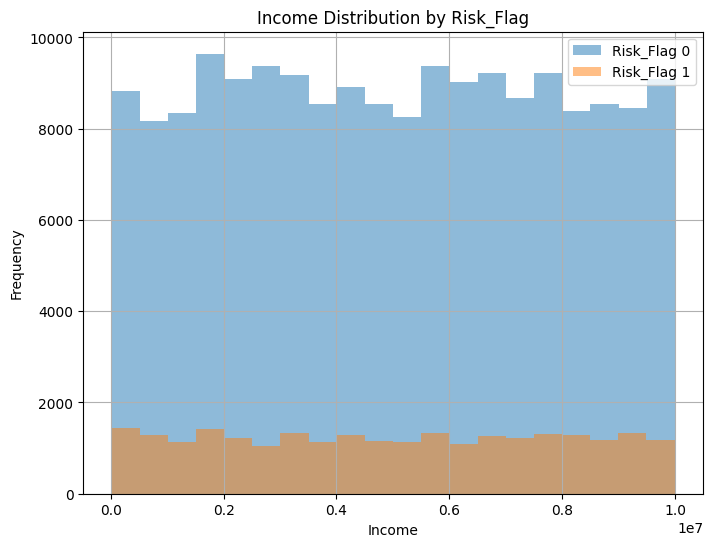

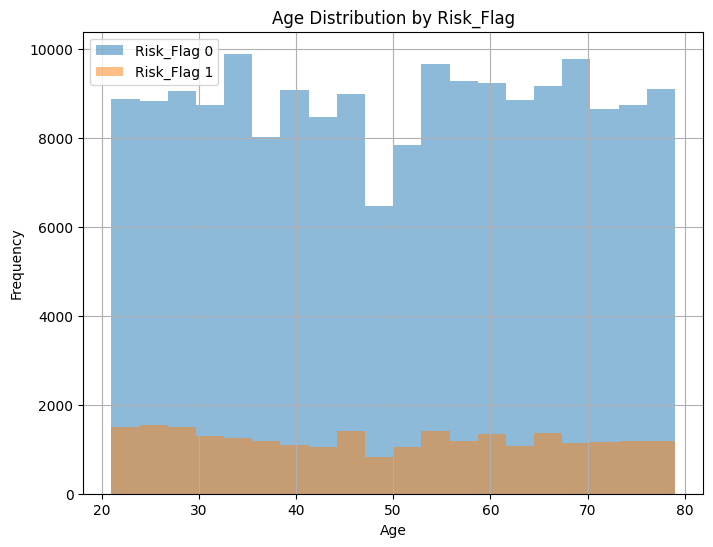

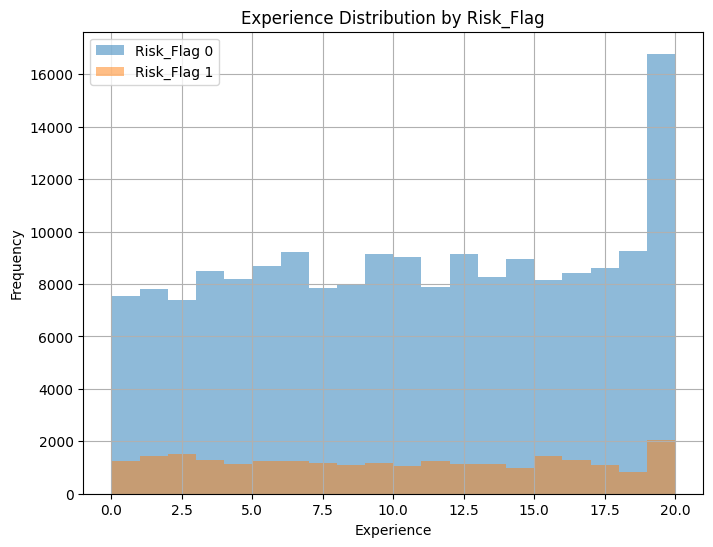

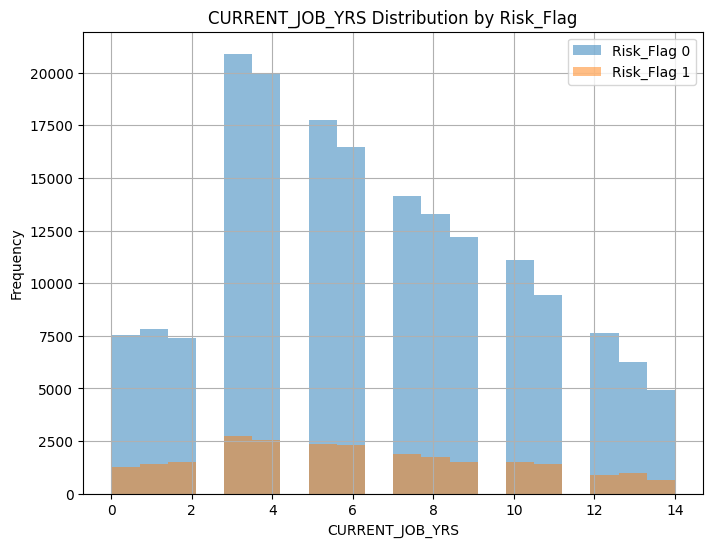

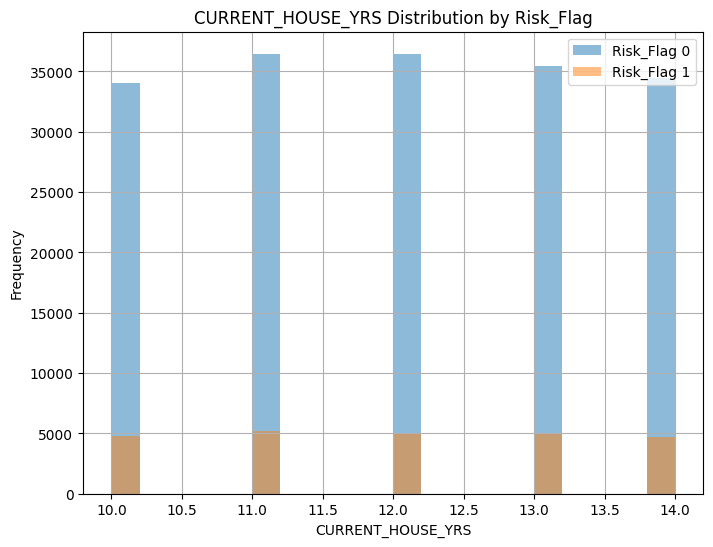

In [13]:
def plot_feature_distribution_by_risk_flag(train_df, features, risk_flag_column='Risk_Flag', bins=20):
    """
    Plots the distribution of continuous features by the risk flag.

    Parameters:
    - train_df: DataFrame containing the data
    - features: List of continuous feature columns to plot
    - risk_flag_column: Name of the column indicating risk flag (default is 'Risk_Flag')
    - bins: Number of bins for the histogram (default is 20)
    """
    for feature in features:
        plt.figure(figsize=(8, 6))

        # Plot for Risk_Flag 0
        train_df[train_df[risk_flag_column] == 0][feature].hist(alpha=0.5, label=f'{risk_flag_column} 0', bins=bins)

        # Plot for Risk_Flag 1
        train_df[train_df[risk_flag_column] == 1][feature].hist(alpha=0.5, label=f'{risk_flag_column} 1', bins=bins)

        plt.legend()
        plt.title(f'{feature} Distribution by Risk_Flag')
        print(" "*40000)
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

plot_feature_distribution_by_risk_flag(train_df, continuous_features)

### Box-Plot

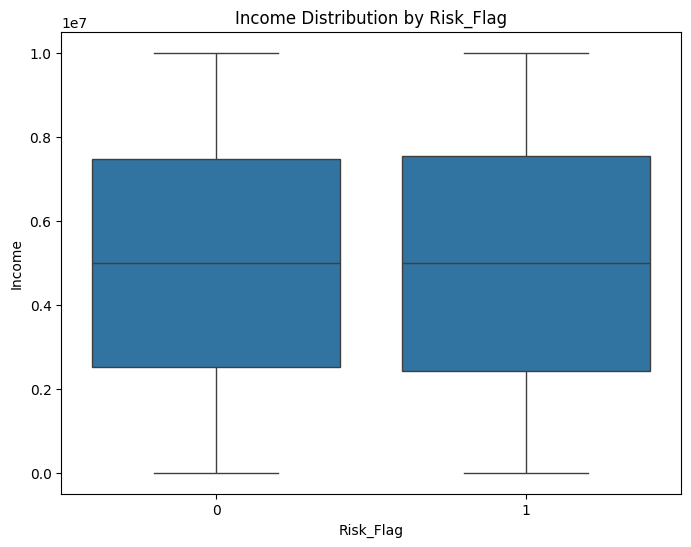

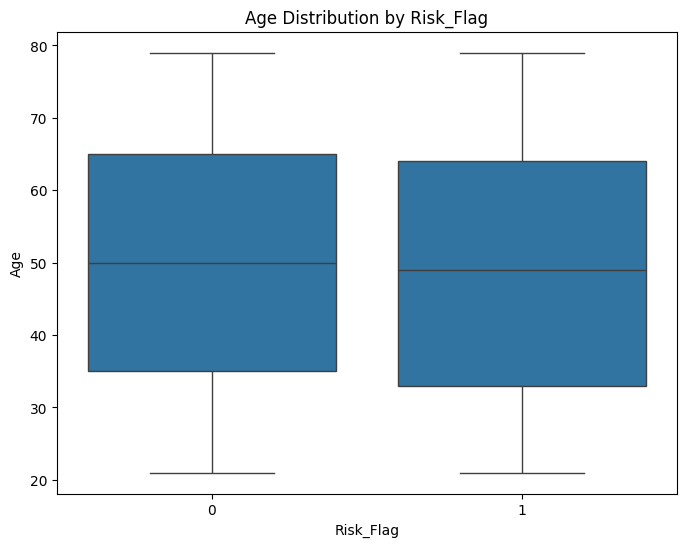

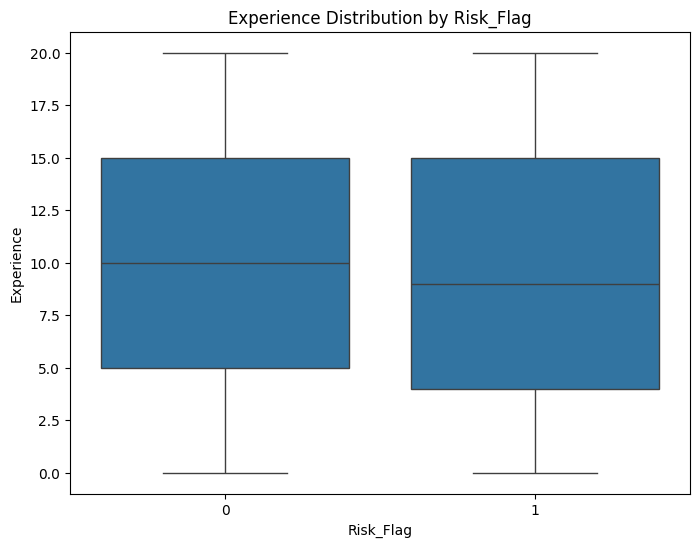

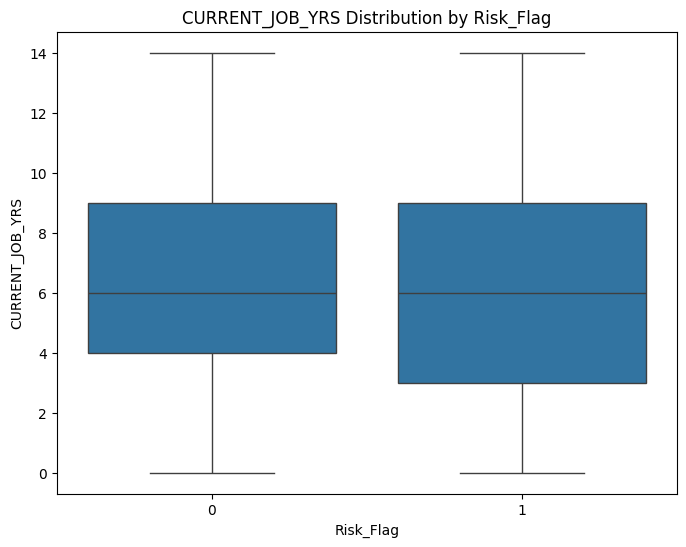

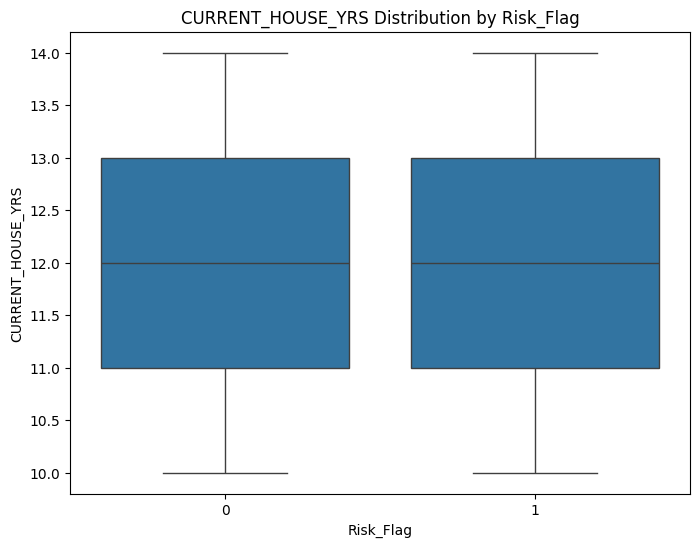

In [14]:
def plot_feature_distribution_by_risk_flag_boxplot(train_df, features, risk_flag_column='Risk_Flag'):
    """
    Plots the distribution of continuous features by risk flag using box plots.

    Parameters:
    - train_df: DataFrame containing the data
    - features: List of continuous feature columns to plot
    - risk_flag_column: Name of the column indicating risk flag (default is 'Risk_Flag')
    """
    for feature in features:
        plt.figure(figsize=(8, 6))

        # Create a box plot for the feature based on the risk flag
        sns.boxplot(x=risk_flag_column, y=feature, data=train_df)

        plt.title(f'{feature} Distribution by Risk_Flag')
        print(" "*40000)
        plt.xlabel('Risk_Flag')
        plt.ylabel(feature)
        plt.show()

# Call the function to plot box plots for continuous features
plot_feature_distribution_by_risk_flag_boxplot(train_df, continuous_features)


### Density Plot

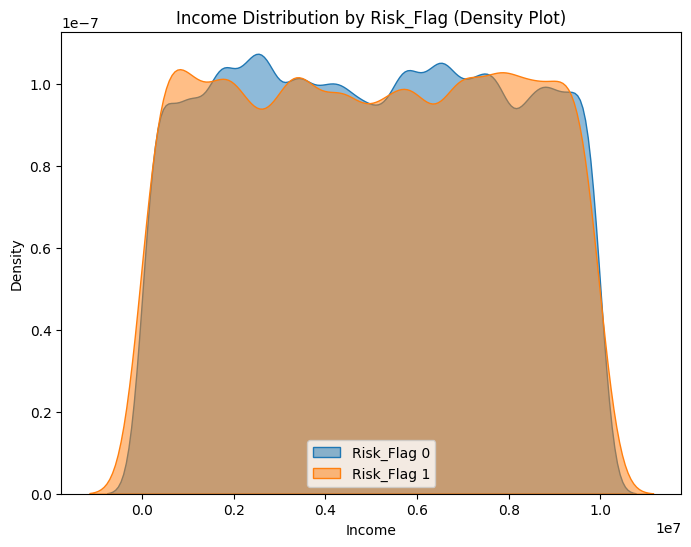

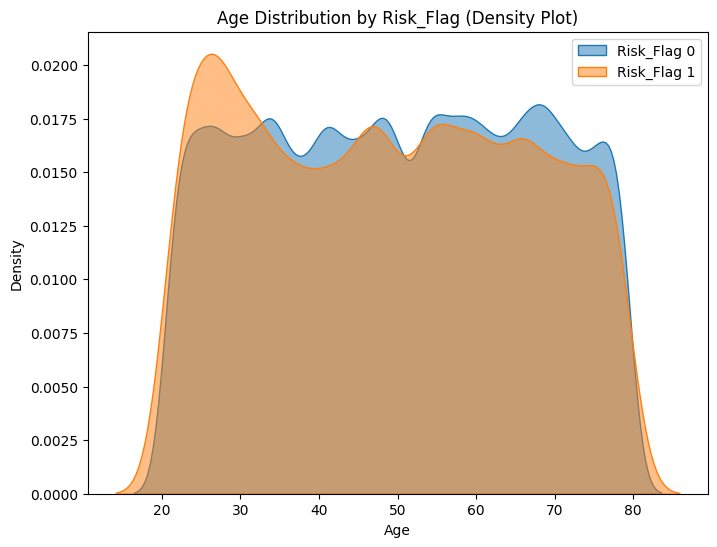

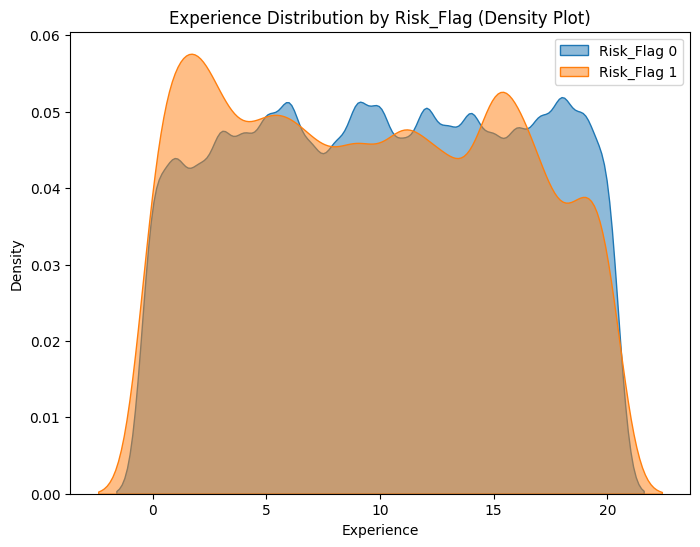

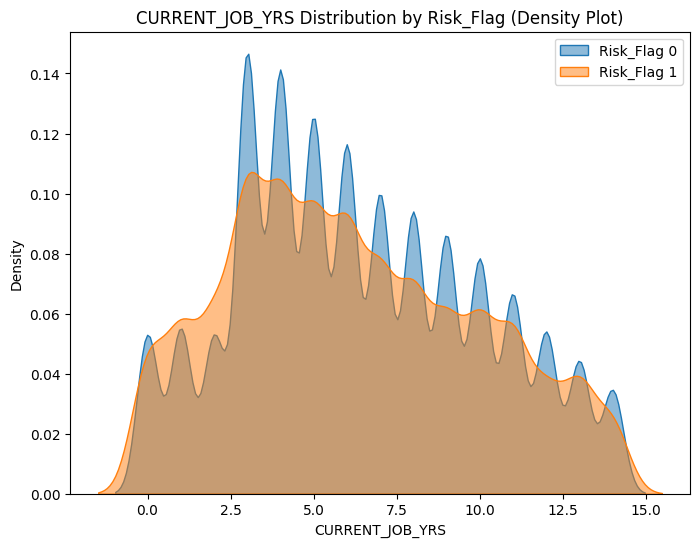

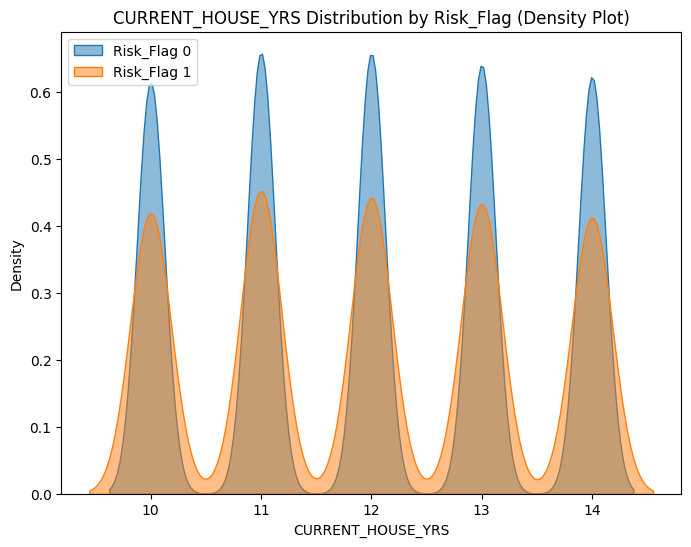

In [15]:
def plot_feature_distribution_by_risk_flag_density(train_df, risk_flag_column='Risk_Flag'):
    """
    Plots the distribution of continuous features by risk flag using density plots (KDE).

    Parameters:
    - train_df: DataFrame containing the data
    - risk_flag_column: Name of the column indicating risk flag (default is 'Risk_Flag')
    """
    # Get all continuous features excluding 'Risk_Flag'
    continuous_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Exclude 'Risk_Flag' from the list of continuous features
    continuous_features = [feature for feature in continuous_features if feature != risk_flag_column]

    # Create a density plot for each continuous feature
    for feature in continuous_features:
        plt.figure(figsize=(8, 6))

        # Plot for Risk_Flag 0
        sns.kdeplot(train_df[train_df[risk_flag_column] == 0][feature], label=f'{risk_flag_column} 0', fill=True, alpha=0.5)

        # Plot for Risk_Flag 1
        sns.kdeplot(train_df[train_df[risk_flag_column] == 1][feature], label=f'{risk_flag_column} 1', fill=True, alpha=0.5)

        plt.title(f'{feature} Distribution by Risk_Flag (Density Plot)')
        print(" "*40000)
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend()
        plt.show()

# Call the function to plot density plots for continuous features
plot_feature_distribution_by_risk_flag_density(train_df)


### Scatter Plot

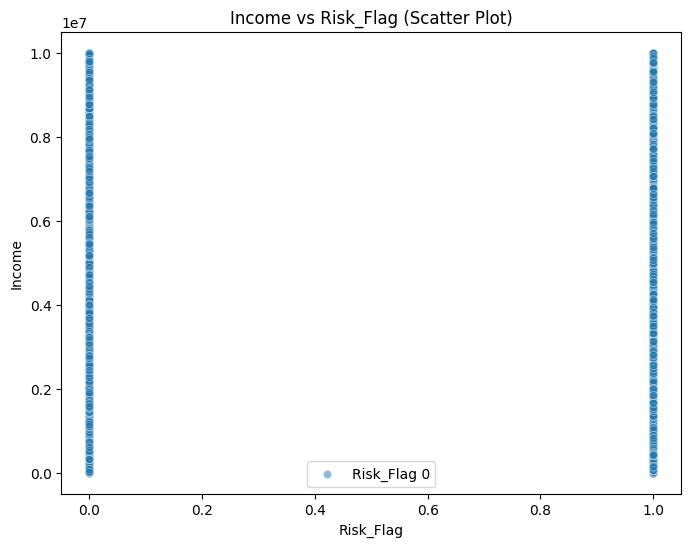

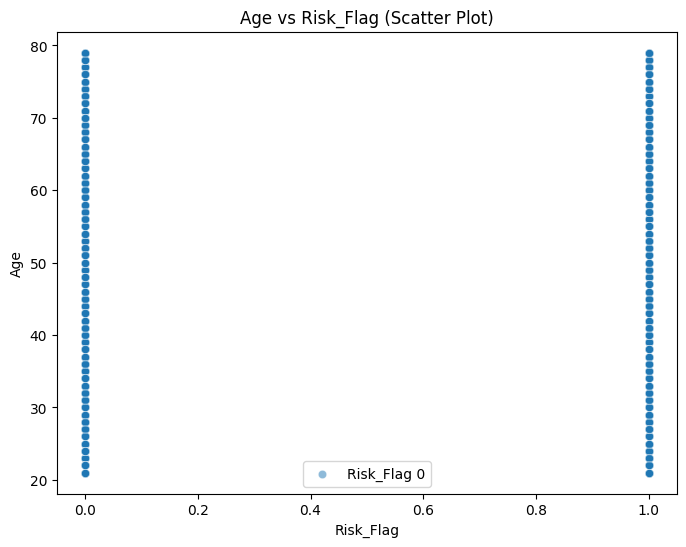

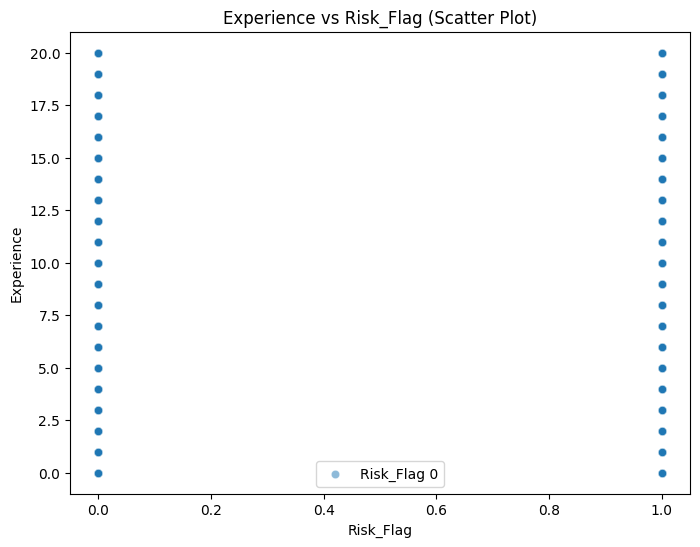

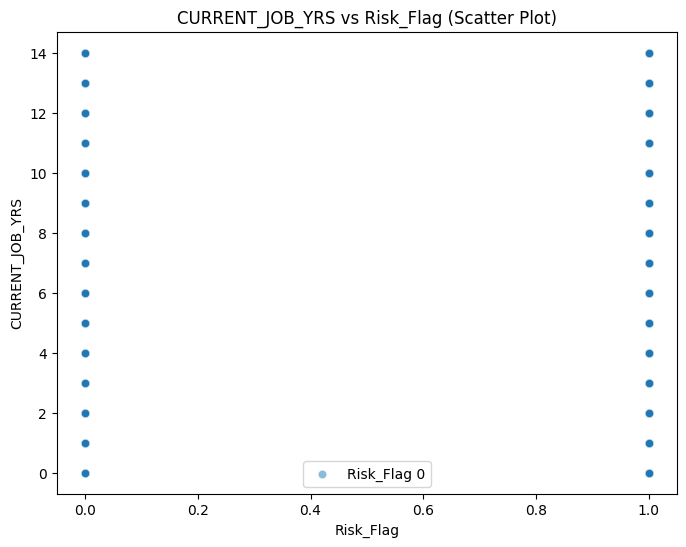

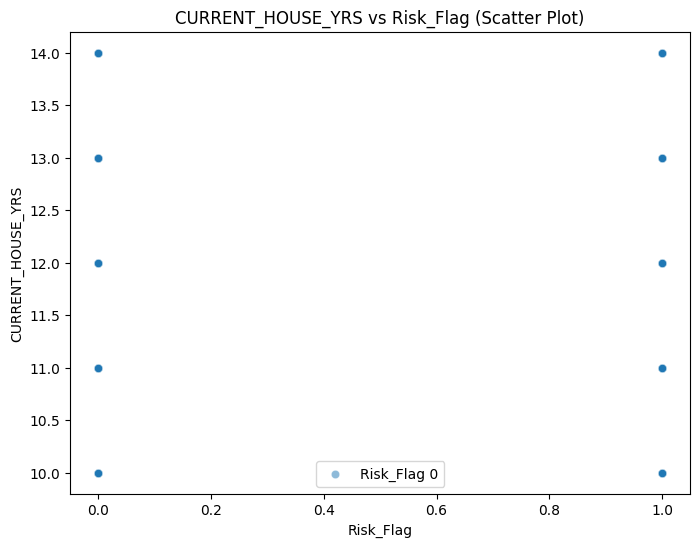

In [16]:
def plot_feature_distribution_by_risk_flag_scatter(train_df, risk_flag_column='Risk_Flag'):
    """
    Plots scatter plots of continuous features against risk flag.

    Parameters:
    - train_df: DataFrame containing the data
    - risk_flag_column: Name of the column indicating risk flag (default is 'Risk_Flag')
    """
    # Get all continuous features excluding 'Risk_Flag'
    continuous_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Exclude 'Risk_Flag' from the list of continuous features
    continuous_features = [feature for feature in continuous_features if feature != risk_flag_column]

    # Create a scatter plot for each continuous feature
    for feature in continuous_features:
        plt.figure(figsize=(8, 6))

        # Scatter plot for Risk_Flag 0
        sns.scatterplot(x=train_df[risk_flag_column], y=train_df[feature], label=f'{risk_flag_column} 0', alpha=0.5)

        plt.title(f'{feature} vs Risk_Flag (Scatter Plot)')
        print(" "*40000)
        plt.xlabel('Risk_Flag')
        plt.ylabel(feature)
        plt.legend()
        plt.show()

# Call the function to plot scatter plots for continuous features
plot_feature_distribution_by_risk_flag_scatter(train_df)


## For Categorical Features

### Getting Categorical Features

In [17]:
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns
categorical_df = train_df[categorical_columns]


In [18]:
categorical_df

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
0,single,rented,no,Secretary,Bilaspur,Chhattisgarh
1,single,rented,no,Librarian,Amritsar,Punjab
2,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh
3,single,rented,no,Chef,Mysore[7][8][9],Karnataka
4,single,rented,yes,Technical_writer,Bareilly,Uttar_Pradesh
...,...,...,...,...,...,...
201595,single,rented,no,Civil_engineer,Thane,Maharashtra
201596,single,rented,no,Web_designer,Sambhal,Uttar_Pradesh
201597,single,rented,no,Dentist,Kurnool[18],Andhra_Pradesh
201598,single,rented,no,Computer_operator,South_Dumdum,West_Bengal


### Printing All Unique Items In Categorical Colum

In [19]:
def print_unique_categorical_values(df):
    # Select categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # Print unique values for each categorical column
    for col in categorical_columns:
        print(f"Unique values in '{col}':")
        print(df[col].unique())
        print()  # For better readability


print_unique_categorical_values(train_df)


Unique values in 'Married/Single':
['single' 'married']

Unique values in 'House_Ownership':
['rented' 'owned' 'norent_noown']

Unique values in 'Car_Ownership':
['no' 'yes']

Unique values in 'Profession':
['Secretary' 'Librarian' 'Artist' 'Chef' 'Technical_writer' 'Firefighter'
 'Mechanical_engineer' 'Surveyor' 'Physician' 'Chemical_engineer'
 'Microbiologist' 'Industrial_Engineer' 'Geologist' 'Designer'
 'Civil_servant' 'Fashion_Designer' 'Comedian' 'Army_officer'
 'Police_officer' 'Chartered_Accountant' 'Hotel_Manager'
 'Graphic_Designer' 'Official' 'Engineer' 'Software_Developer' 'Analyst'
 'Architect' 'Lawyer' 'Magistrate' 'Surgeon' 'Civil_engineer'
 'Statistician' 'Psychologist' 'Flight_attendant' 'Drafter' 'Politician'
 'Web_designer' 'Consultant' 'Financial_Analyst' 'Computer_operator'
 'Petroleum_Engineer' 'Scientist' 'Technician' 'Air_traffic_controller'
 'Aviator' 'Design_Engineer' 'Computer_hardware_engineer' 'Economist'
 'Technology_specialist' 'Dentist' 'Biomedical_Engin

### Barchart

In [20]:
def plot_risk_by_category(train_df, category_column, figsize=(12, 6), rotation=45,
                         top_n=None, horizontal=False, normalize=False):
    """
    Plots the distribution of Risk_Flag across categories of a given column.
    Uses red for Risk_Flag=1 (At Risk) and blue for Risk_Flag=0 (No Risk).
    No numbers are displayed on the bars.

    Parameters:
    - train_df: DataFrame containing the data
    - category_column: Name of the categorical column to analyze
    - figsize: Size of the figure (width, height)
    - rotation: Rotation angle for x-axis labels
    - top_n: If specified, only plot the top N most frequent categories
    - horizontal: If True, plot horizontal bars instead of vertical
    - normalize: If True, shows percentages instead of counts
    """
    # Prepare data
    if top_n is not None:
        top_categories = train_df[category_column].value_counts().nlargest(top_n).index
        filtered_df = train_df[train_df[category_column].isin(top_categories)]
    else:
        filtered_df = train_df.copy()

    # Create cross-tabulation
    cross_tab = pd.crosstab(filtered_df[category_column], filtered_df['Risk_Flag'])

    if normalize:
        cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

    # Sort by total count if not normalized, or by risk percentage if normalized
    if not normalize:
        cross_tab = cross_tab.loc[cross_tab.sum(axis=1).sort_values(ascending=False).index]
    else:
        cross_tab = cross_tab.loc[(cross_tab[1]/cross_tab.sum(axis=1)).sort_values(ascending=False).index]

    # Create plot with custom colors (blue for 0, red for 1)
    plt.figure(figsize=figsize)
    colors = ['#1f77b4', '#d62728']  # Blue for No Risk, Red for At Risk

    if horizontal:
        ax = cross_tab.plot(kind='barh', stacked=True,
                           color=colors,
                           edgecolor='black')
        plt.xlabel('Percentage' if normalize else 'Count')
        plt.ylabel(category_column)
    else:
        ax = cross_tab.plot(kind='bar', stacked=True,
                           color=colors,
                           edgecolor='black')
        plt.ylabel('Percentage' if normalize else 'Count')
        plt.xlabel(category_column)
        plt.xticks(rotation=rotation)

    # Customize legend
    plt.legend(title='Risk Flag', labels=['No Risk', 'At Risk'],
               bbox_to_anchor=(1.05, 1), loc='upper left')

    title = f'Risk Distribution by {category_column}'
    if normalize:
        title += ' (Percentage)'
    if top_n:
        title += f' (Top {top_n} Categories)'
    plt.title(title)

    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

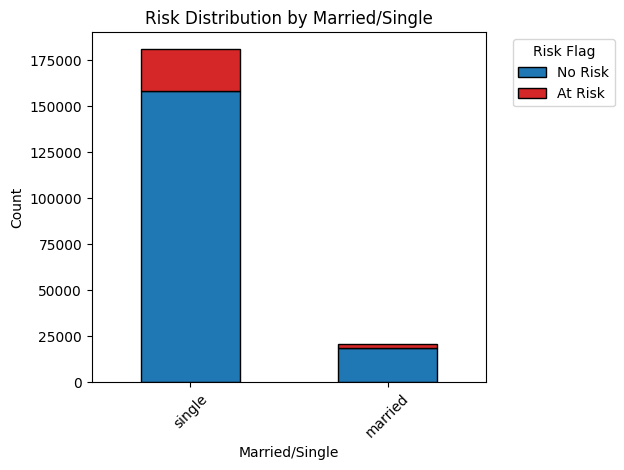

<Figure size 1200x600 with 0 Axes>

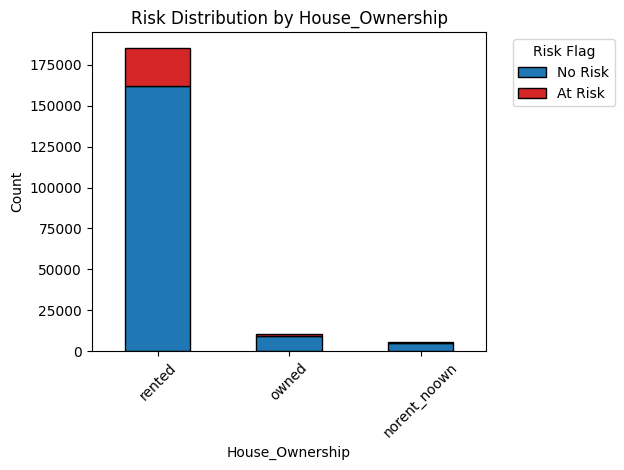

<Figure size 1400x800 with 0 Axes>

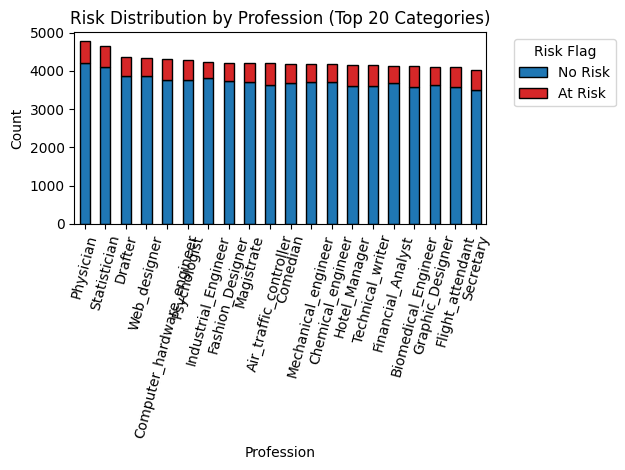

<Figure size 1200x1600 with 0 Axes>

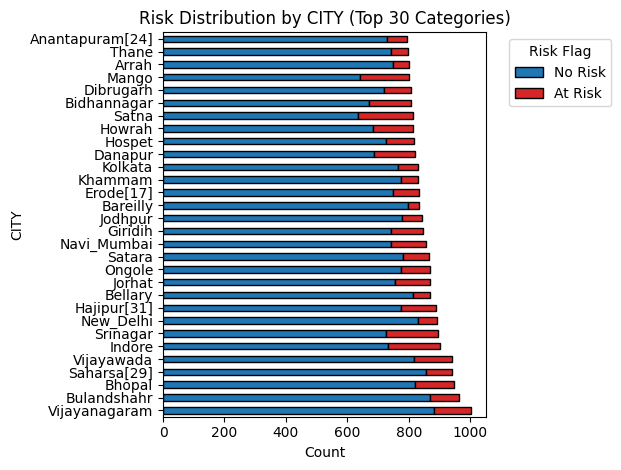

<Figure size 1200x600 with 0 Axes>

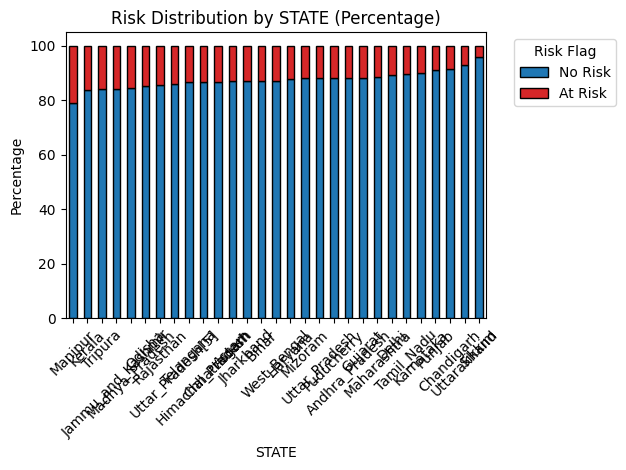

In [21]:
# Binary categories
plot_risk_by_category(train_df, 'Married/Single')
plot_risk_by_category(train_df, 'House_Ownership')

# Profession (top 20)
plot_risk_by_category(train_df, 'Profession', figsize=(14, 8), rotation=75, top_n=20)

# City (horizontal plot showing top 30)
plot_risk_by_category(train_df, 'CITY', figsize=(12, 16), horizontal=True, top_n=30)

# State (normalized percentage view)
plot_risk_by_category(train_df, 'STATE', figsize=(12, 6), rotation=45, normalize=True)

### Stacked Bar Plot

In [22]:
def plot_risk_distribution(data, category_column, top_n=None, normalize=False,
                         figsize=None, rotation=None, horizontal=False):
    """
    Universal function to plot any categorical variable against Risk_Flag
    with intelligent automatic formatting.

    Parameters:
    - data: DataFrame containing your data
    - category_column: Column to plot against Risk_Flag
    - top_n: Show only top N categories (default shows all)
    - normalize: Show percentages instead of counts
    - figsize: Custom figure size (automatic if None)
    - rotation: Custom x-axis label rotation (automatic if None)
    - horizontal: Use horizontal bars (default vertical for <15 cats)
    """
    # Prepare data
    if top_n:
        top_cats = data[category_column].value_counts().nlargest(top_n).index
        plot_data = data[data[category_column].isin(top_cats)]
    else:
        plot_data = data.copy()

    # Create cross-tab
    cross_tab = pd.crosstab(plot_data[category_column], plot_data['Risk_Flag'])

    # Normalize if requested
    if normalize:
        cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

    # Sort by total count (or by risk percentage if normalized)
    sort_by = cross_tab.sum(axis=1) if not normalize else cross_tab[1]/cross_tab.sum(axis=1)
    cross_tab = cross_tab.loc[sort_by.sort_values(ascending=False).index]

    # Set smart defaults if not specified
    n_categories = len(cross_tab)
    if figsize is None:
        if horizontal:
            figsize = (12, min(6 + n_categories * 0.5, 30))  # Dynamic height
        else:
            figsize = (min(6 + n_categories * 0.3, 20), 8)

    if rotation is None:
        rotation = 45 if n_categories > 5 else 0
        if n_categories > 15:
            rotation = 90

    # Determine orientation
    if horizontal is None:
        horizontal = n_categories > 15

    # Create plot
    plt.figure(figsize=figsize)
    colors = ['#1f77b4', '#d62728']  # Blue=0, Red=1

    if horizontal:
        ax = cross_tab.plot(kind='barh', stacked=True, color=colors, width=0.8)
        plt.xlabel('Percentage' if normalize else 'Count')
        plt.ylabel(category_column)
    else:
        ax = cross_tab.plot(kind='bar', stacked=True, color=colors, width=0.8)
        plt.ylabel('Percentage' if normalize else 'Count')
        plt.xlabel(category_column)
        plt.xticks(rotation=rotation, ha='right' if rotation > 0 else 'center')

    # Add percentage labels if normalized
    if normalize:
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', label_type='center',
                        color='white', fontweight='bold')

    # Formatting
    plt.title(f'Risk Distribution by {category_column}' +
             (' (Normalized)' if normalize else '') +
             (f' (Top {top_n})' if top_n else ''))
    plt.legend(['No Risk', 'At Risk'], title='Risk Flag',
               bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

<Figure size 660x800 with 0 Axes>

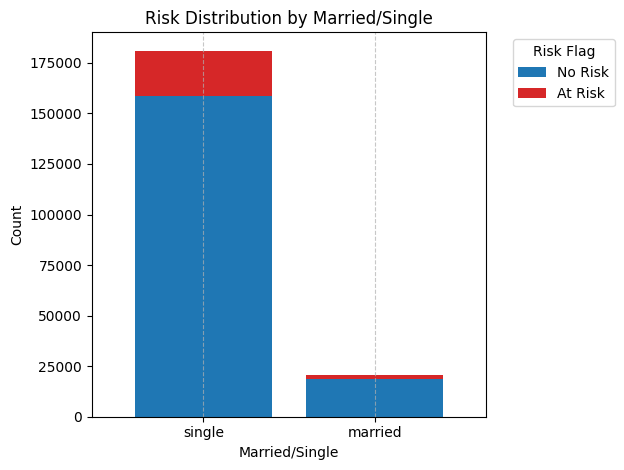

<Figure size 690x800 with 0 Axes>

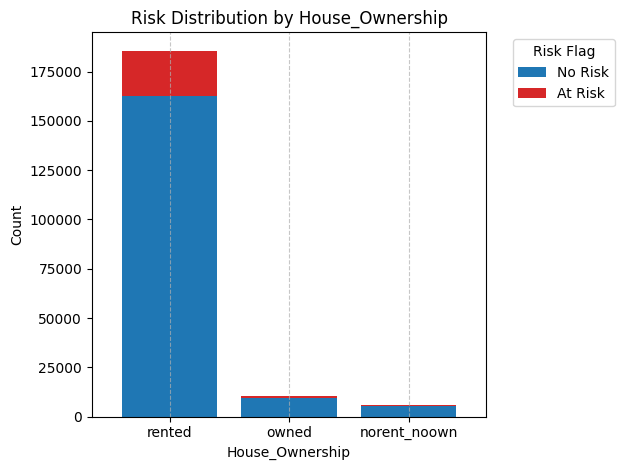

<Figure size 660x800 with 0 Axes>

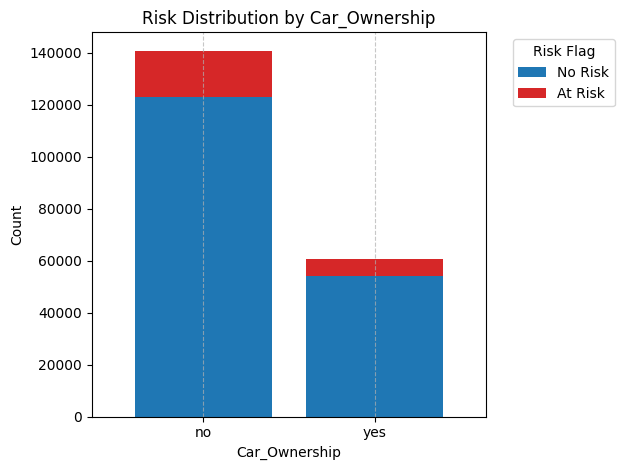

<Figure size 1200x800 with 0 Axes>

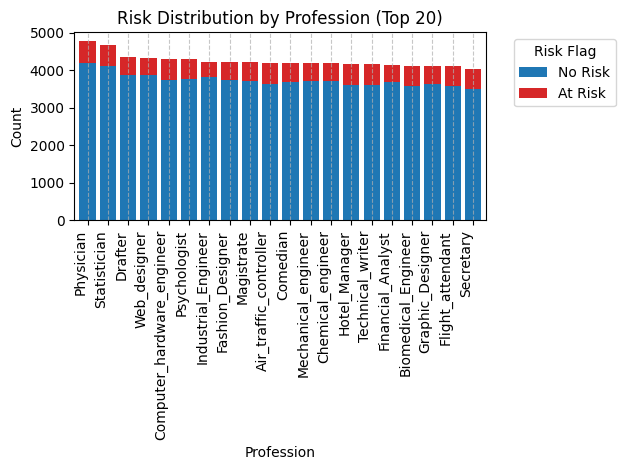

<Figure size 1470x800 with 0 Axes>

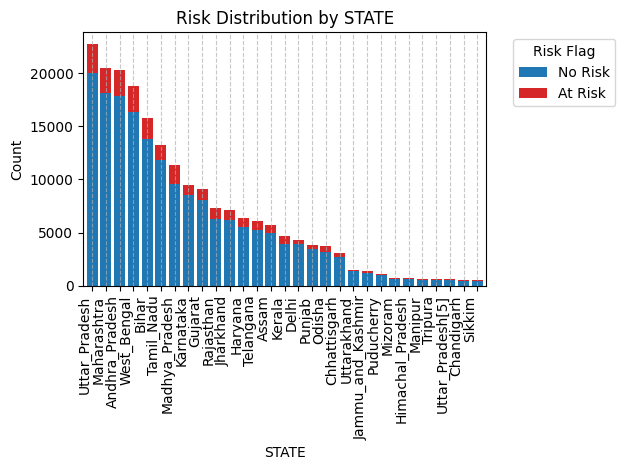

<Figure size 1500x800 with 0 Axes>

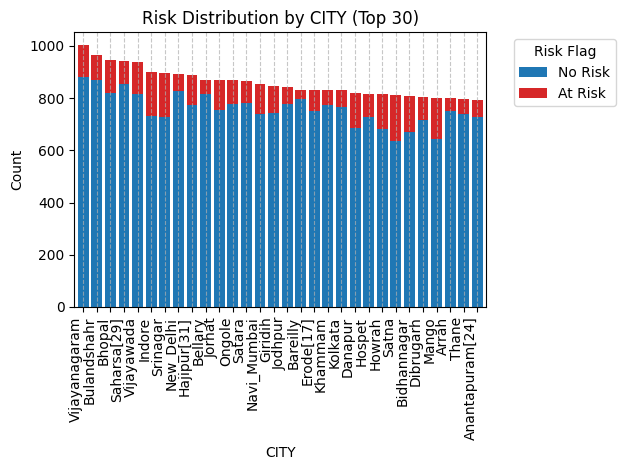

<Figure size 690x800 with 0 Axes>

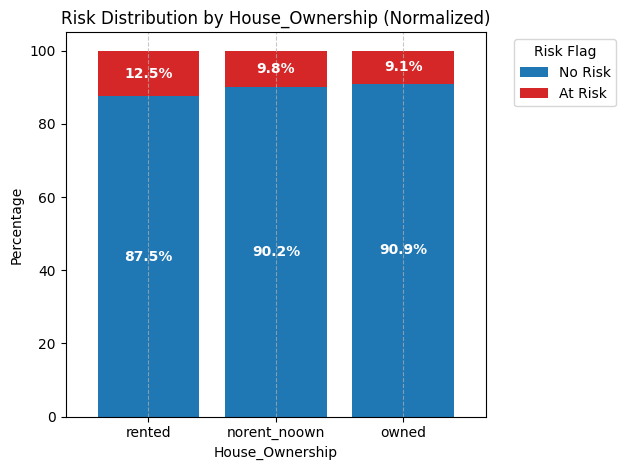

<Figure size 660x800 with 0 Axes>

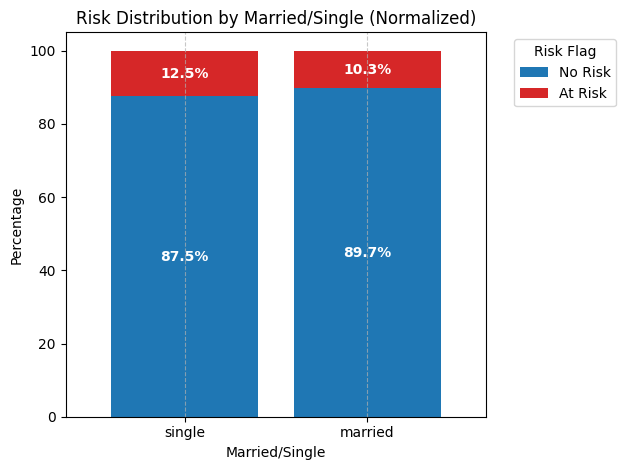

<Figure size 1200x1350 with 0 Axes>

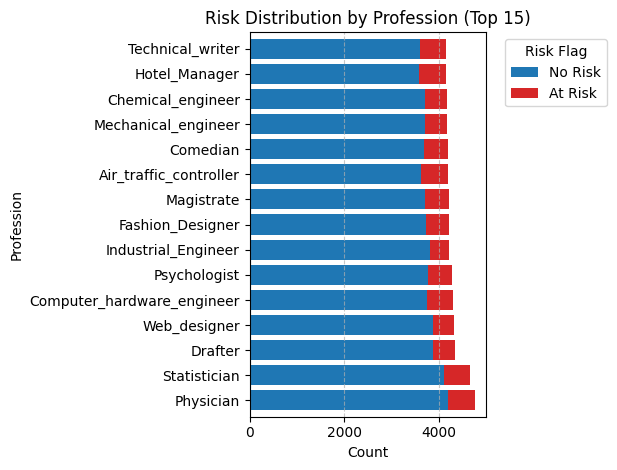

<Figure size 1000x500 with 0 Axes>

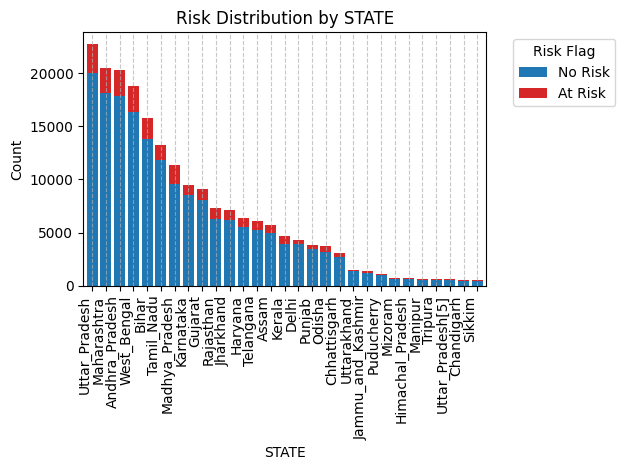

In [23]:
# 1. Binary categories (automatic formatting)
plot_risk_distribution(train_df, 'Married/Single')
plot_risk_distribution(train_df, 'House_Ownership')
plot_risk_distribution(train_df, 'Car_Ownership')

# 2. Profession (auto horizontal for many categories)
plot_risk_distribution(train_df, 'Profession', top_n=20)

# 3. STATE (vertical by default)
plot_risk_distribution(train_df, 'STATE')

# 4. CITY (top 30, auto horizontal)
plot_risk_distribution(train_df, 'CITY', top_n=30)

# 5. Normalized views
plot_risk_distribution(train_df, 'House_Ownership', normalize=True)
plot_risk_distribution(train_df, 'Married/Single', normalize=True)

# 6. Force horizontal for any variable
plot_risk_distribution(train_df, 'Profession', top_n=15, horizontal=True)

# 7. Custom figure size
plot_risk_distribution(train_df, 'STATE', figsize=(10, 5))

### Count Plot

In [24]:
def plot_risk_counts(data, category_column, top_n=None,
                   figsize=None, rotation=None, horizontal=None,
                   show_percentage=False):
    """
    Creates count plots for categorical variables vs Risk_Flag.

    Parameters:
    - data: DataFrame
    - category_column: Categorical column to plot
    - top_n: Show only top N categories
    - figsize: Custom figure size (automatic if None)
    - rotation: X-axis label rotation (automatic if None)
    - horizontal: Use horizontal bars (automatic if None)
    - show_percentage: Add percentage labels to bars
    """
    # Prepare data - ensure Risk_Flag exists
    if 'Risk_Flag' not in data.columns:
        raise ValueError("DataFrame must contain 'Risk_Flag' column")

    # Filter top categories if requested
    if top_n:
        top_cats = data[category_column].value_counts().nlargest(top_n).index
        plot_data = data[data[category_column].isin(top_cats)].copy()
    else:
        plot_data = data.copy()

    # Ensure we have data to plot
    if plot_data.empty:
        raise ValueError(f"No data available for {category_column} with given filters")

    # Set smart defaults
    n_categories = plot_data[category_column].nunique()
    if figsize is None:
        if horizontal or (horizontal is None and n_categories > 8):
            figsize = (10, max(6, n_categories * 0.5))
        else:
            figsize = (max(8, n_categories * 0.7), 6)

    if rotation is None:
        rotation = 45 if n_categories > 5 else 0
        if n_categories > 15:
            rotation = 90

    if horizontal is None:
        horizontal = n_categories > 8

    # Create plot
    plt.figure(figsize=figsize)
    order = plot_data[category_column].value_counts().index

    try:
        if horizontal:
            ax = sns.countplot(data=plot_data, y=category_column, hue='Risk_Flag',
                             palette=['#1f77b4', '#d62728'], order=order)
            plt.xlabel('Count')
        else:
            ax = sns.countplot(data=plot_data, x=category_column, hue='Risk_Flag',
                             palette=['#1f77b4', '#d62728'], order=order)
            plt.ylabel('Count')
            plt.xticks(rotation=rotation, ha='right' if rotation > 0 else 'center')
    except Exception as e:
        raise ValueError(f"Error creating plot for {category_column}: {str(e)}")

    # Add percentage labels if requested
    if show_percentage:
        try:
            total_counts = plot_data[category_column].value_counts().loc[order]
            for p in ax.patches:
                if horizontal:
                    width = p.get_width()
                    if width <= 0:
                        continue
                    y = p.get_y() + p.get_height()/2
                    category_idx = int(y) if y.is_integer() else -1
                    if 0 <= category_idx < len(order):
                        total = total_counts.iloc[category_idx]
                        percent = 100 * width / total
                        ax.text(width + max(total_counts)*0.01, y,
                               f'{percent:.1f}%', ha='left', va='center')
                else:
                    height = p.get_height()
                    if height <= 0:
                        continue
                    x = p.get_x() + p.get_width()/2
                    category_idx = int(x) if x.is_integer() else -1
                    if 0 <= category_idx < len(order):
                        total = total_counts.iloc[category_idx]
                        percent = 100 * height / total
                        ax.text(x, height + max(total_counts)*0.01,
                               f'{percent:.1f}%', ha='center', va='bottom')
        except Exception as e:
            print(f"Could not add percentage labels: {str(e)}")

    # Formatting
    plt.title(f'Risk Counts by {category_column}' + (f' (Top {top_n})' if top_n else ''))
    print(" " * 1000)
    plt.legend(title='Risk Flag', labels=['No Risk', 'At Risk'])
    plt.grid(axis='x' if horizontal else 'y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

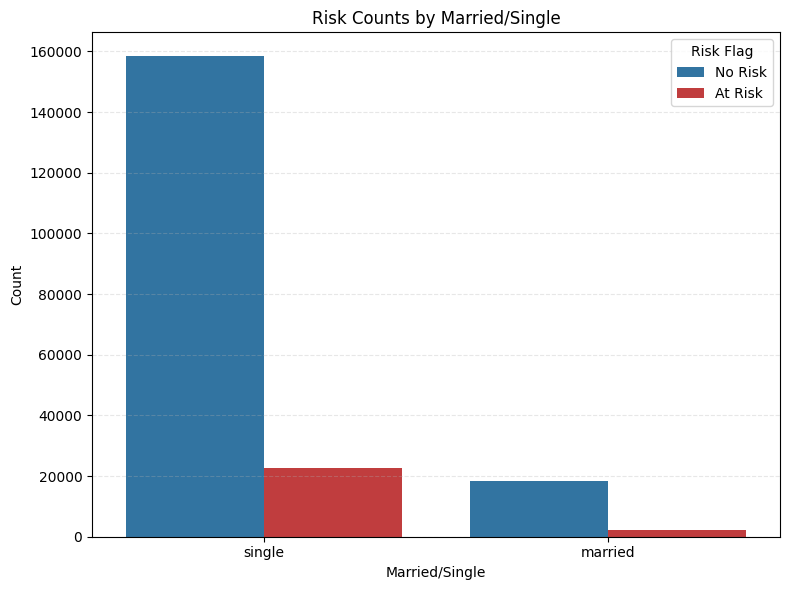

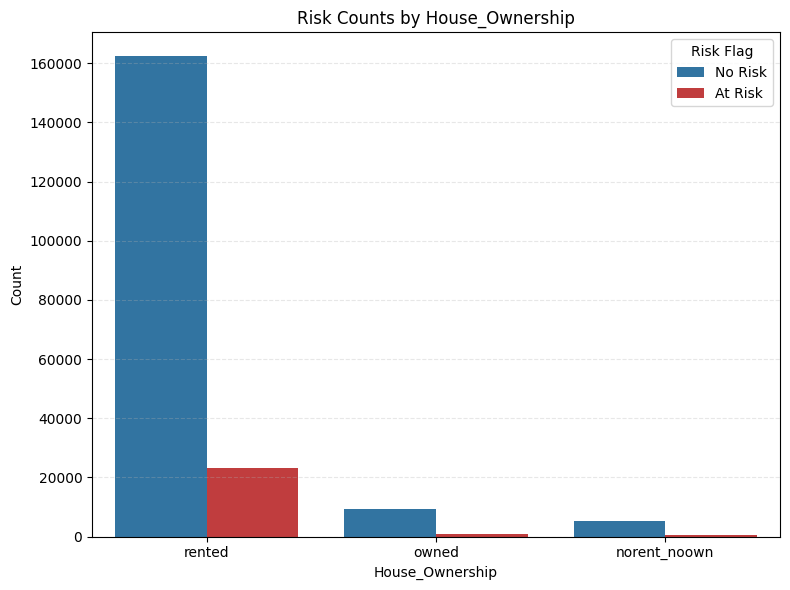

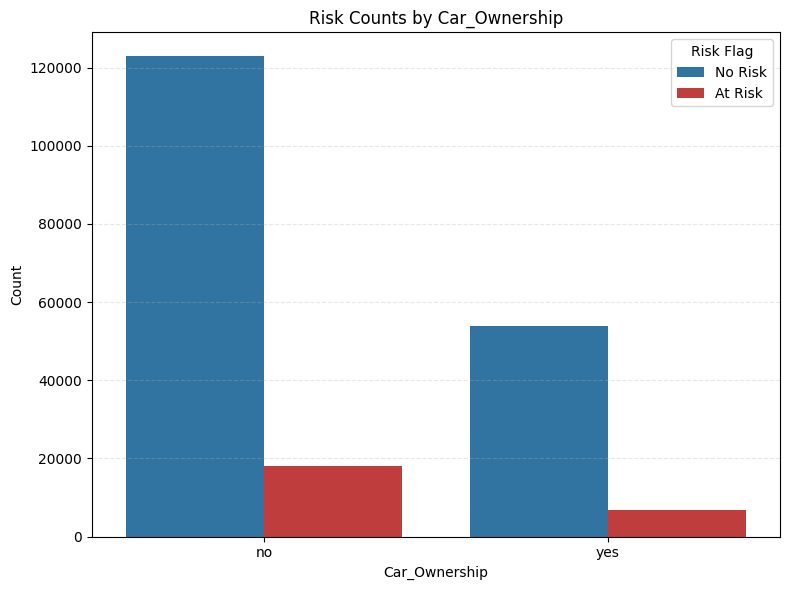

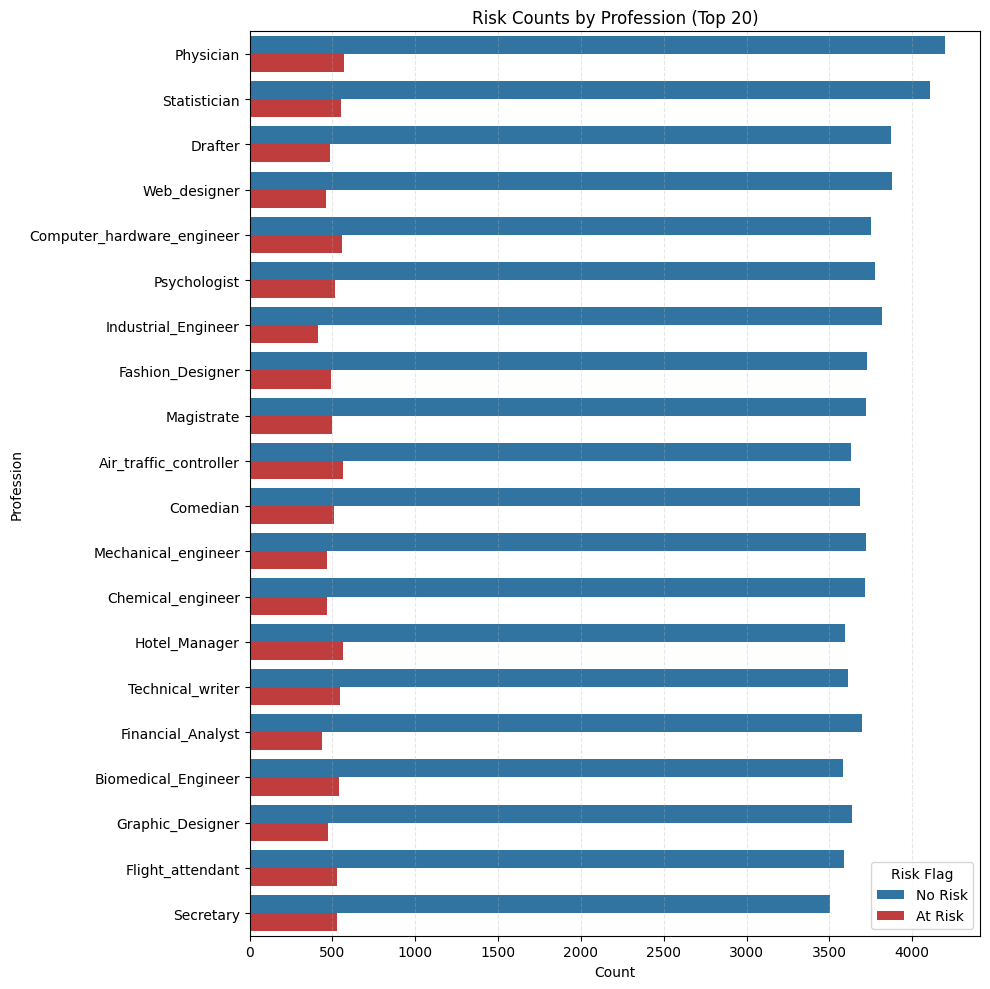

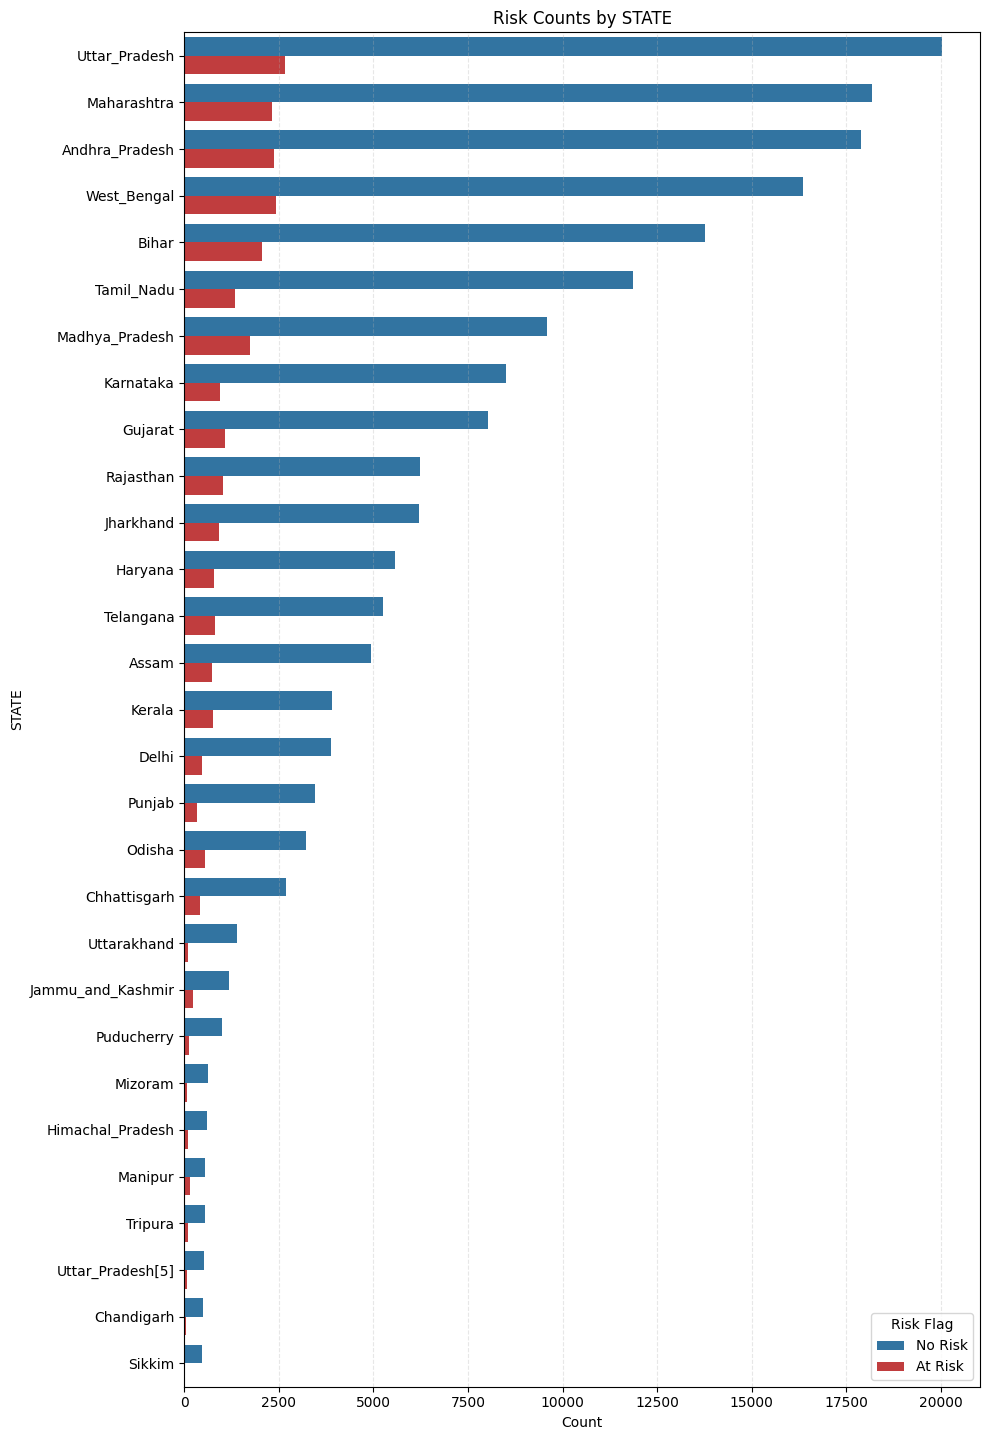

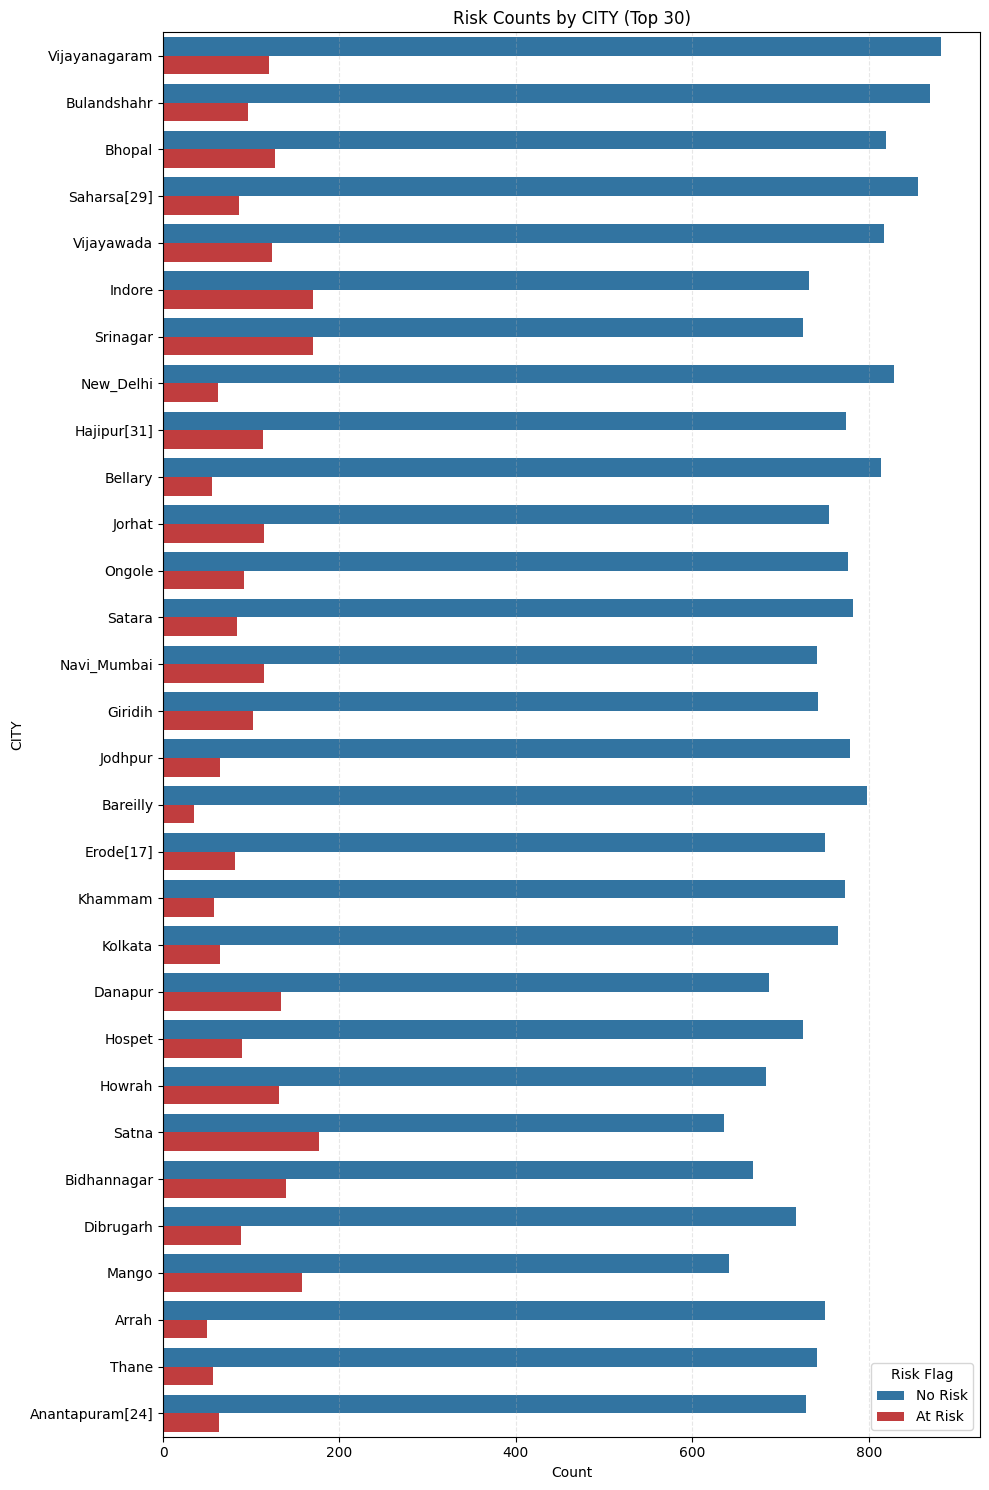

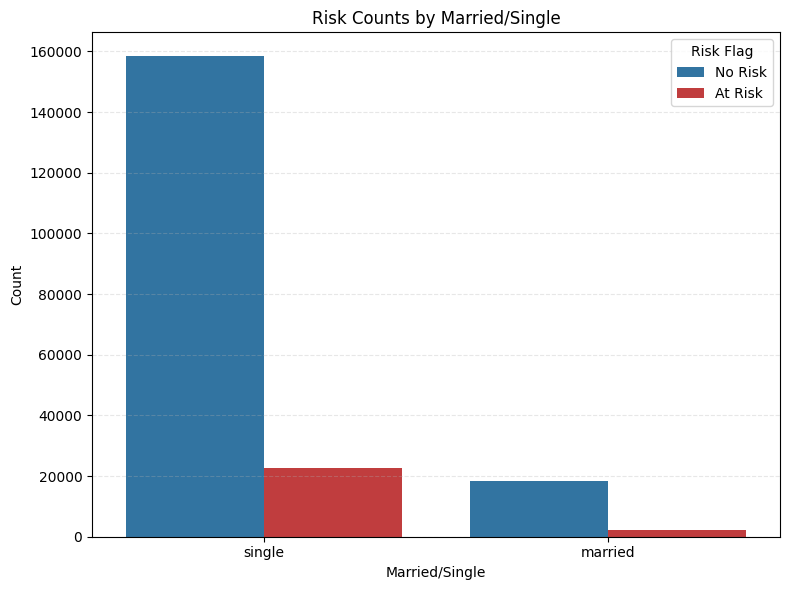

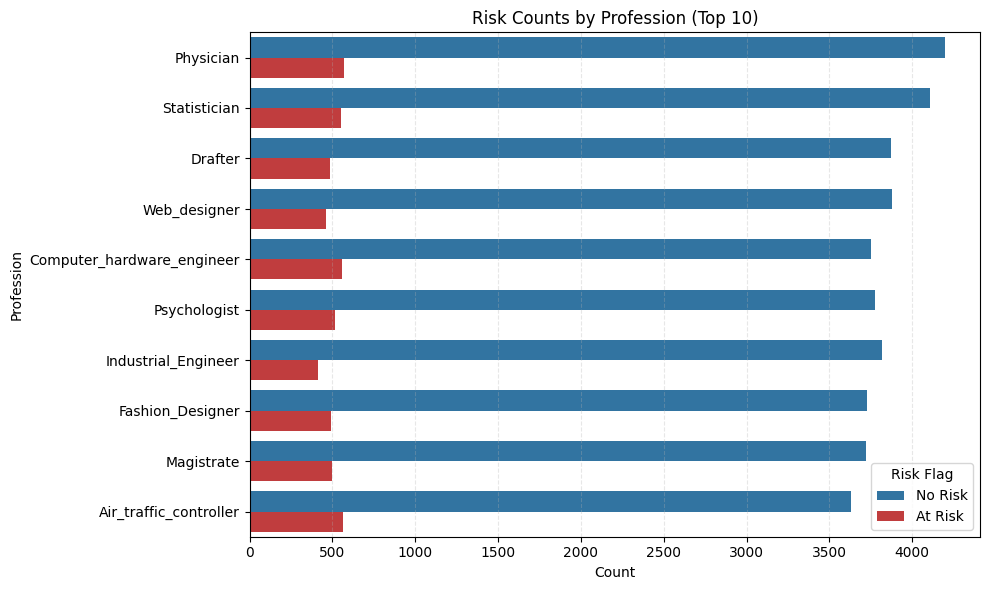

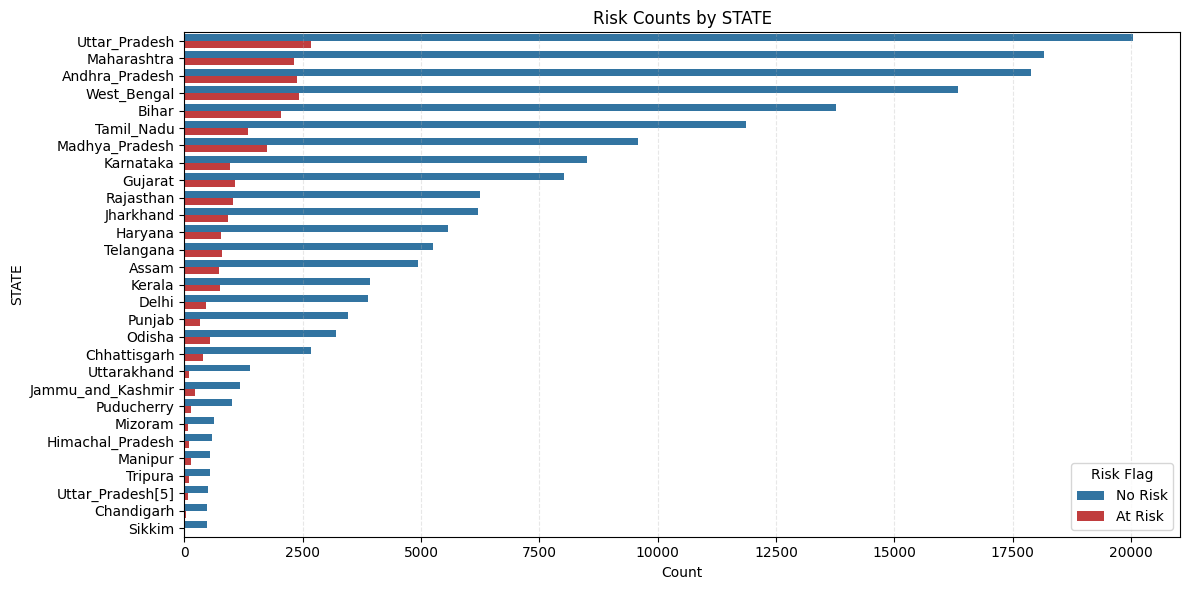

In [25]:
# 1. Binary categories
plot_risk_counts(train_df, 'Married/Single')
plot_risk_counts(train_df, 'House_Ownership')
plot_risk_counts(train_df, 'Car_Ownership')

# 2. Profession (top 20, auto horizontal)
plot_risk_counts(train_df, 'Profession', top_n=20)

# 3. STATE (vertical)
plot_risk_counts(train_df, 'STATE')

# 4. CITY (top 30, horizontal)
plot_risk_counts(train_df, 'CITY', top_n=30, horizontal=True)

# 5. With percentage labels
plot_risk_counts(train_df, 'Married/Single', show_percentage=True)
plot_risk_counts(train_df, 'Profession', top_n=10, show_percentage=True)

# 6. Custom figure size
plot_risk_counts(train_df, 'STATE', figsize=(12, 6))

### HeatMap

In [26]:
# Select numeric columns
numeric_df = train_df.select_dtypes(include=['int64', 'float64'])

# If Risk_Flag isn't numeric, convert it
if 'Risk_Flag' in train_df.columns and train_df['Risk_Flag'].dtype == 'object':
    numeric_df['Risk_Flag'] = train_df['Risk_Flag'].astype('int')

# Handle categorical columns (optional: encode them)
categorical_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
for col in categorical_cols:
    if col in train_df.columns:
        # Simple label encoding for demonstration (consider one-hot for nominal categories)
        numeric_df[col] = train_df[col].astype('category').cat.codes

# Drop columns with no variance (if any)
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

In [27]:
corr_matrix = numeric_df.corr(method='pearson')  # For linear relationships
# corr_matrix = numeric_df.corr(method='spearman')  # For monotonic relationships

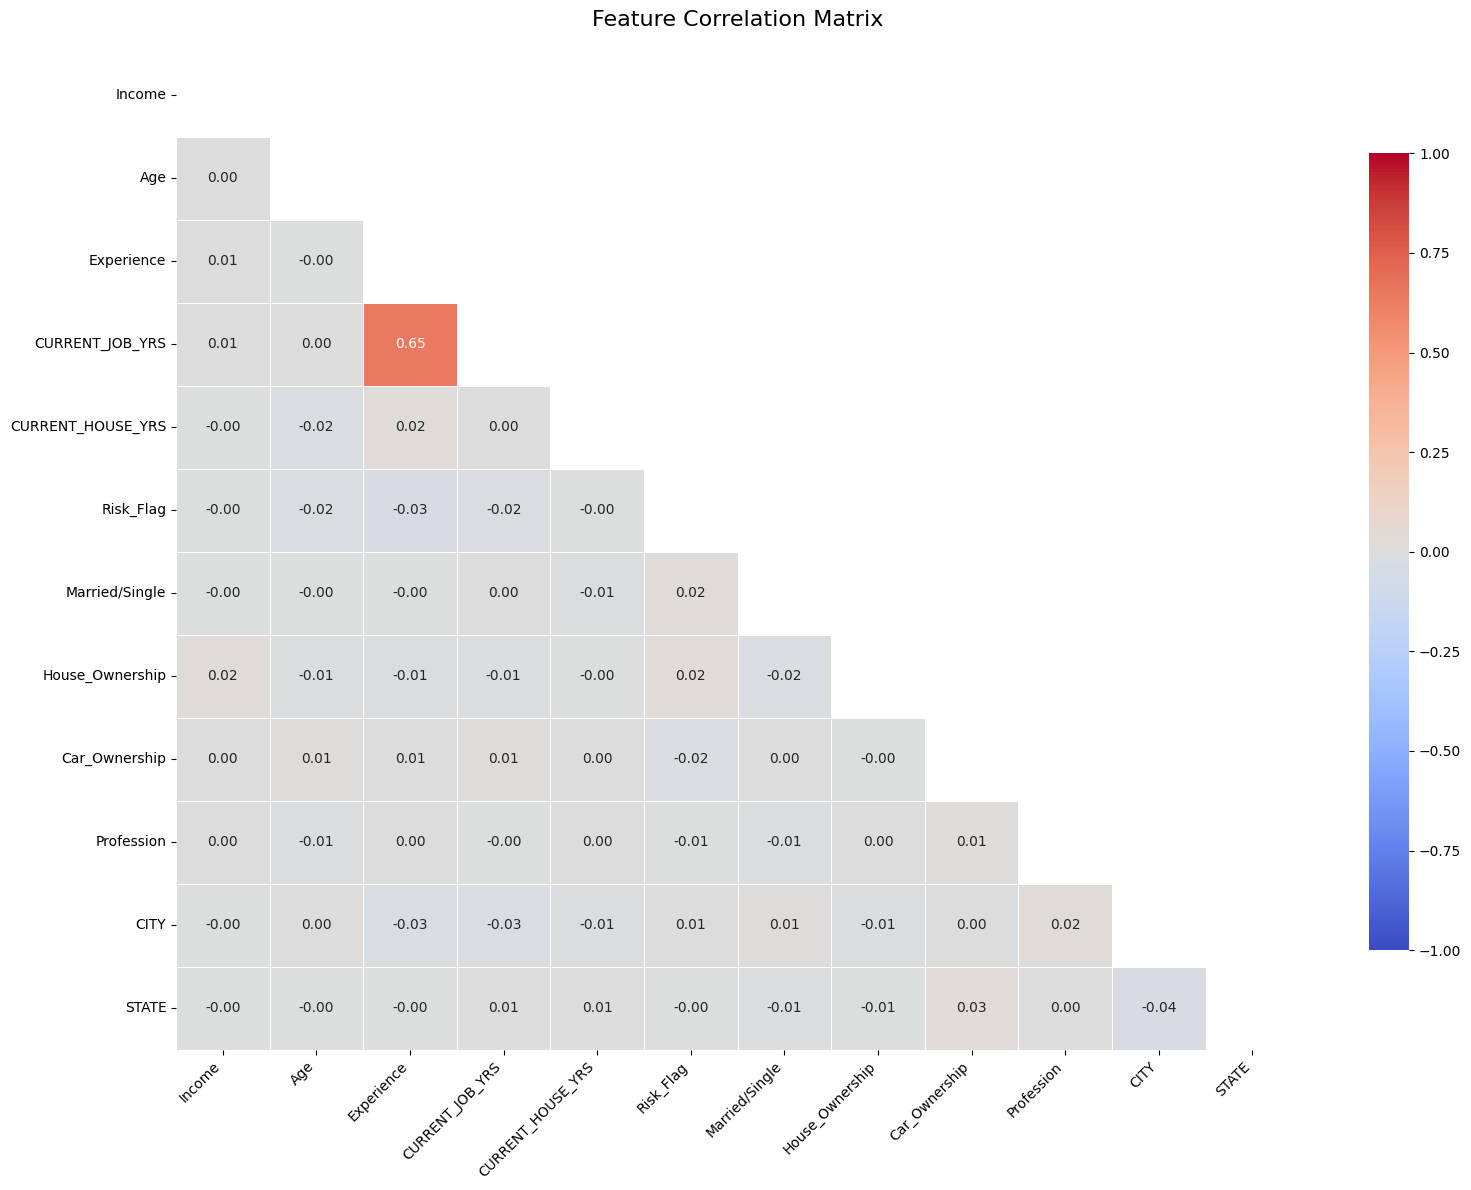

In [28]:
print(" \n")
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle

sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title("Feature Correlation Matrix", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Insights From Visualisation/EDA

Here's a clean, professional summary of key insights without currency symbols:

### **Key Borrower Risk Insights for Lenders**

#### **1. Income and Risk Relationship**
- **Highest Risk Group:** Earners between 20,000-30,000 (32.5% risk)
- **Safest Group:** Earners between 30,000-40,000 (only 1.7% risk)
- **Surprise Finding:** Even high earners (900,000+) show 12% risk

#### **2. Age and Experience Factors**
- **Most Risky:** Young borrowers (18-24 years) at 17% risk
- **Least Risky:** Seniors (75+ years) at just 5% risk
- **Job Stability Matters:** Employees with <3 years experience are 14-17% risk vs 10% for 10+ year veterans

#### **3. Lifestyle Indicators**
- **Marital Status:** Singles (12.5% risk) vs married (10.3% risk)
- **Housing:** Renters (13.5% risk) vs homeowners (10.5% risk)
- **Vehicle Ownership:** Car owners (11.1% risk) vs non-owners (12.8% risk)

#### **4. Professional Risk Variations**
- **High-Risk Professions:** Police (16.7%), military (15.6%), accountants (15.2%), software developers (14.7%)
- **Low-Risk Professions:** Petroleum engineers (8.4%), industrial engineers (9.7%)

#### **5. Geographic Risk Patterns**
- **Safest Regions:** Sikkim (4% risk), Uttarakhand (7%), Punjab (9%)
- **Highest Risk Areas:** Manipur (21%), Kerala (16%), Tripura (16%)

### **Recommended Lending Strategy**
**Prioritize:**
- Middle-income applicants (30,000-40,000 range)
- Married homeowners with long job tenure
- Older applicants and engineering professionals

**Apply Caution With:**
- Young adults and new workforce entrants
- Single renters and lower-income applicants
- Certain professions (police, military, finance)
- Applicants from high-risk regions


# 3. DATA CLEANING AND PREPROCESSING

### Check if there's missing Values

In [29]:
train_df.isnull().sum()

,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0
CURRENT_JOB_YRS,0


In [30]:
test_df.isnull().sum()

,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0
CURRENT_JOB_YRS,0


### Check for Duplicates

In [31]:
def check_for_duplicates(df):
    # Get full duplicate rows
    duplicates = df[df.duplicated()]
    # Sum only numeric columns in the duplicates
    total_sum = duplicates.sum(numeric_only=True)
    return total_sum

def check_for_duplicate_columns(df):
    # If df is a Series (one column), convert to DataFrame
    if isinstance(df, pd.Series):
        df = df.to_frame()

    # Count duplicate columns in DataFrame (skip 'Risk_Flag')
    count = sum(df[col].duplicated().any() for col in df.columns if col != 'Risk_Flag')
    return count

def check_for_duplicate_rows(df):
    # Count of fully duplicated rows (excluding the first occurrence)
    num_duplicates = df.duplicated().sum()
    return num_duplicates

def print_column_duplicates(df):
    # If df is a Series (one column), convert to DataFrame
    if isinstance(df, pd.Series):
        df = df.to_frame()

    # Iterate through all columns in DataFrame and check for duplicates
    for col in df.columns:
        if col == 'Risk_Flag':
            continue  # Skip the 'Risk_Flag' column
        num_duplicates = df[col].duplicated().sum()
        if num_duplicates > 0:
            print(f"Column '{col}' has {num_duplicates} duplicate values.")


In [32]:
# Example usage:
values_to_check = train_df["Income"]

# Check for duplicate columns (using a single column in Series)
print(check_for_duplicate_columns(values_to_check))

# Print duplicates in columns (using a single column in Series)
print_column_duplicates(values_to_check)


1
Column 'Income' has 166998 duplicate values.


### Check for Invalid or Out-of-Range Values

In [33]:
def check_invalid_out_of_range_values(df):
    # Check for negative ages
    negative_ages = df[df["Age"] < 0]
    if not negative_ages.empty:
        print(f"Found {len(negative_ages)} rows with negative ages:")
        print(negative_ages)
    else:
        print("No negative ages found.")

    # Check for income above 1,000,000
    high_income = df[df["Income"] > 1_000_000_0]
    if not high_income.empty:
        print(f"Found {len(high_income)} rows with income above 1,000,000:")
        print(high_income)
    else:
        print("No income values above 1,000,000 found.")


In [34]:
check_invalid_out_of_range_values(train_df)

No negative ages found.
No income values above 1,000,000 found.


In [35]:
# Filter and check if income values seem too large
large_incomes = train_df[train_df["Income"] > 10000000]
print(f"Found {len(large_incomes)} rows with income greater than 1 million.")
print(large_incomes.head())

Found 0 rows with income greater than 1 million.
Empty DataFrame
Columns: [Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, Risk_Flag]
Index: []


# REMOVING DUPLICATES

In [36]:
# train_df = train_df.drop_duplicates(subset=[col for col in train_df.columns if col != 'Risk_Flag'])

# 4. FEATURE SELECTION AND ENGINEERING

### Getting Mid Point of Ages

In [37]:
def group_ages_with_midpoints(df, age_col='Age', bin_size=10):
    """
    Groups ages into bins and computes the midpoint of each bin.

    Parameters:
    - df: pandas DataFrame
    - age_col: name of the age column (default 'Age')
    - bin_size: size of each age bin (default 10)

    Returns:
    - df: original DataFrame with two new columns: 'Age_Group' and 'Age_Midpoint'
    """
    # Define age bin edges
    min_age = df[age_col].min()
    max_age = df[age_col].max()
    bins = np.arange(min_age, max_age + bin_size, bin_size)

    # Create age labels (e.g., '20-30') and midpoints
    labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
    midpoints = [(bins[i] + bins[i+1] - 1) / 2 for i in range(len(bins)-1)]

    # Cut ages into groups
    df['Age_Group'] = pd.cut(df[age_col], bins=bins, labels=labels, include_lowest=True)
    df['Age_Midpoint'] = pd.cut(df[age_col], bins=bins, labels=midpoints, include_lowest=True)
    df['Age_Midpoint'] = df['Age_Midpoint'].astype(float)  # Ensure numeric type

    return df


In [38]:
#Train Set
train_df = group_ages_with_midpoints(train_df, age_col='Age', bin_size=10)

#Test Set
test_df = group_ages_with_midpoints(test_df, age_col='Age', bin_size=10)

test_df[['Age', 'Age_Group', 'Age_Midpoint']].head(), test_df[['Age', 'Age_Group', 'Age_Midpoint']].head()

(   Age Age_Group  Age_Midpoint
 0   60     51-60          55.5
 1   77     71-80          75.5
 2   51     41-50          45.5
 3   78     71-80          75.5
 4   30     21-30          25.5,
    Age Age_Group  Age_Midpoint
 0   60     51-60          55.5
 1   77     71-80          75.5
 2   51     41-50          45.5
 3   78     71-80          75.5
 4   30     21-30          25.5)

**We grouped ages and used midpoints to simplify the data, reduce variability, and capture meaningful patterns in how risk changes across life stages. This approach improves model performance, enhances interpretability, and ensures more consistent and reliable risk predictions.**

### ADDING FEATURES TO BOOST ALGORITHM

In [39]:
def feature_engineering(df):
    # Convert Age_Group like '21-30' to midpoint numeric value
    def age_group_to_midpoint(age_group):
        if isinstance(age_group, str) and '-' in age_group:
            start, end = map(int, age_group.split('-'))
            return (start + end) / 2
        return np.nan

    # Apply the transformations
    df['Age_Midpoint'] = df['Age_Group'].apply(age_group_to_midpoint).astype(float)

    # Derived Features using Age_Midpoint
    df['Experience_Age_Ratio'] = df['Experience'] / df['Age_Midpoint']
    df['Job_Stability'] = df['CURRENT_JOB_YRS'] / (df['Experience'] + 1)
    df['House_Stability'] = df['CURRENT_HOUSE_YRS'] / df['Age_Midpoint']
    df['Experienced'] = (df['Experience'] > 10).astype(int)

    df['Income_to_Exp_Ratio'] = df['Income'] / (df['Experience'] + 1)

    # Wealth Index - Weighted combination of income and asset ownership
    df['Wealth_Index'] = (
        df['Income'] * df['House_Ownership'].map({'Rented': 0.5, 'Owned': 1, 'Norent_Noown': 0}).fillna(0) +
        df['Car_Ownership'].map({'yes': 1, 'no': 0}).fillna(0)
    )

    # Stability score of current house relative to adult life duration
    df['House_Stability_Score'] = df['CURRENT_HOUSE_YRS'] / (df['Age'] - 18 + 1)

    # Categorical Group-based Features
    profession_stability = df.groupby('Profession')['CURRENT_JOB_YRS'].mean().to_dict()
    df['Profession_Stability'] = df['Profession'].map(profession_stability)

    city_income_avg = df.groupby('CITY')['Income'].mean().to_dict()
    df['City_Cost_of_Living'] = df['CITY'].map(city_income_avg)

    df['Marital_Home_Status'] = df['Married/Single'] + "_" + df['House_Ownership']

    # Interactions
    df['Income_Age_Interaction'] = df['Income'] * df['Age']
    df['Experience_Age_Ratio'] = df['Experience'] / (df['Age'] - 18 + 1)

    # Binning the 'Experience' column
    bins = [0, 5, 15, 50]
    labels = ['Early', 'Mid', 'Late']
    df['Career_Stage'] = pd.cut(df['Experience'], bins=bins, labels=labels, right=False)

    # Add 'Unknown' to the existing categories
    df['Career_Stage'] = df['Career_Stage'].cat.add_categories('Unknown')

    # Fill NaN values (if any) with 'Unknown'
    df['Career_Stage'] = df['Career_Stage'].fillna('Unknown')

    df['Years_Since_First_Job'] = df['Age'] - df['Experience']

    return df


In [40]:
train_df = feature_engineering(train_df)
test_df = feature_engineering(test_df)

**These engineered features enhance our risk assessment model by capturing deeper behavioral and socio-economic patterns that standard variables might miss.**

- **Experience_Age_Ratio, Job_Stability, and House_Stability** help assess life and career consistency, which can signal lower or higher risk.
- **Wealth_Index** and **Income-to-Experience Ratio** combine financial status and earning efficiency, which are key indicators of stability.
- **Profession_Stability** and **City_Cost_of_Living** introduce group-level insights into employment and regional economic context.
- **State_Risk_Profile** reflects the average risk behavior at a state level.
- **Categorical interactions** like **Marital_Home_Status** and **Career_Stage** add socio-contextual insights that improve the model's ability to generalize.
- **Years_Since_First_Job** and **Income_Age_Interaction** capture lifecycle and income maturity.

Together, these features help the model make smarter, more reliable predictions about who is more likely to be high risk.

In [41]:
train_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,...,Experienced,Income_to_Exp_Ratio,Wealth_Index,House_Stability_Score,Profession_Stability,City_Cost_of_Living,Marital_Home_Status,Income_Age_Interaction,Career_Stage,Years_Since_First_Job
0,4588175,49,20,single,rented,no,Secretary,Bilaspur,Chhattisgarh,6,...,1,2.184845e+05,0.0,0.343750,6.546898,4.997362e+06,single_rented,224820575,Late,29
1,6510821,31,15,single,rented,no,Librarian,Amritsar,Punjab,12,...,1,4.069263e+05,0.0,0.714286,5.840186,4.802182e+06,single_rented,201835451,Late,16
2,9338129,26,7,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh,4,...,0,1.167266e+06,0.0,1.555556,6.240021,4.801638e+06,single_rented,242791354,Mid,19
3,8053436,42,8,single,rented,no,Chef,Mysore[7][8][9],Karnataka,8,...,0,8.948262e+05,0.0,0.440000,6.273344,5.763525e+06,single_rented,338244312,Mid,34
4,3589662,42,18,single,rented,yes,Technical_writer,Bareilly,Uttar_Pradesh,13,...,1,1.889296e+05,1.0,0.520000,6.257397,4.632000e+06,single_rented,150765804,Late,24


In [42]:
test_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,...,Experienced,Income_to_Exp_Ratio,Wealth_Index,House_Stability_Score,Profession_Stability,City_Cost_of_Living,Marital_Home_Status,Income_Age_Interaction,Career_Stage,Years_Since_First_Job
0,2687545,60,3,single,rented,yes,Technical_writer,Mango,Jharkhand,3,...,0,6.718862e+05,1.0,0.255814,6.164740,5.014457e+06,single_rented,161252700,Early,57
1,9559493,77,3,single,rented,no,Army_officer,Sirsa,Haryana,3,...,0,2.389873e+06,0.0,0.216667,6.391540,5.732619e+06,single_rented,736080961,Early,74
2,5203215,51,19,single,rented,no,Civil_servant,Hajipur[31],Bihar,8,...,1,2.601608e+05,0.0,0.382353,6.219866,5.039517e+06,single_rented,265363965,Late,32
3,7235618,78,16,single,owned,no,Artist,Tadepalligudem,Andhra_Pradesh,14,...,1,4.256246e+05,0.0,0.180328,6.214357,5.628266e+06,single_owned,564378204,Late,62
4,4408094,30,8,single,rented,yes,Petroleum_Engineer,Saharsa[29],Bihar,4,...,0,4.897882e+05,1.0,0.769231,6.398844,4.817775e+06,single_rented,132242820,Mid,22


In [43]:
# prompt: Drop Age_Group in train_df and test_df

# Drop 'Age_Group' from train_df and test_df
train_df = train_df.drop(columns=['Age_Group'], errors='ignore')
test_df = test_df.drop(columns=['Age_Group'], errors='ignore')


## Splitting Data Set

In [44]:
train_X = train_df.drop(["Risk_Flag"], axis=1)
train_y = train_df["Risk_Flag"]

test_X = test_df

In [45]:
test_X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,...,Experienced,Income_to_Exp_Ratio,Wealth_Index,House_Stability_Score,Profession_Stability,City_Cost_of_Living,Marital_Home_Status,Income_Age_Interaction,Career_Stage,Years_Since_First_Job
0,2687545,60,3,single,rented,yes,Technical_writer,Mango,Jharkhand,3,...,0,6.718862e+05,1.0,0.255814,6.164740,5.014457e+06,single_rented,161252700,Early,57
1,9559493,77,3,single,rented,no,Army_officer,Sirsa,Haryana,3,...,0,2.389873e+06,0.0,0.216667,6.391540,5.732619e+06,single_rented,736080961,Early,74
2,5203215,51,19,single,rented,no,Civil_servant,Hajipur[31],Bihar,8,...,1,2.601608e+05,0.0,0.382353,6.219866,5.039517e+06,single_rented,265363965,Late,32
3,7235618,78,16,single,owned,no,Artist,Tadepalligudem,Andhra_Pradesh,14,...,1,4.256246e+05,0.0,0.180328,6.214357,5.628266e+06,single_owned,564378204,Late,62
4,4408094,30,8,single,rented,yes,Petroleum_Engineer,Saharsa[29],Bihar,4,...,0,4.897882e+05,1.0,0.769231,6.398844,4.817775e+06,single_rented,132242820,Mid,22


In [46]:
print(train_X.shape, train_y.shape, test_X.shape)

(201600, 25) (201600,) (50400, 25)


### Spliting Train Set Into Train Set and Test Set

In [47]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

In [48]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(161280, 25) (40320, 25) (161280,) (40320,)


### Removing Duplicate Income Row From Train Set

### Encoding Categorical Features for Train and Test Set

In [49]:
def encode_category_data(train_set, test_set=None):
    train_set = train_set.copy()

    # Binary categorical features — use LabelEncoder
    binary_cols = ['Married/Single', 'Car_Ownership']
    for col in binary_cols:
        le = LabelEncoder()

        # Explicitly fit on the unique categories in train_set for these binary features
        train_set[col] = le.fit_transform(train_set[col])

        if test_set is not None:
            # Transform the test_set using the fitted encoder
            test_set[col] = le.transform(test_set[col])

    # Multi-class categorical features — use OrdinalEncoder
    multi_class_cols = ['House_Ownership', 'Profession', 'CITY', 'STATE', 'Marital_Home_Status', 'Career_Stage']
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

    train_set[multi_class_cols] = oe.fit_transform(train_set[multi_class_cols])

    if test_set is not None:
        test_set[multi_class_cols] = oe.transform(test_set[multi_class_cols])

    # If test_set is provided, return both train and test sets
    if test_set is not None:
        return train_set, test_set
    else:
        return train_set


In [50]:
# Train Set
X_train, X_test = encode_category_data(X_train, X_test)

# Test Set
test_X = encode_category_data(test_X)

In [51]:
X_train.shape, X_test.shape, test_X.shape

((161280, 25), (40320, 25), (50400, 25))

### Applying Standard Scalling

In [52]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on train set, transform both train and test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [53]:
print(X_train.shape, X_test.shape)

(161280, 25) (40320, 25)


# 5. MODEL DEVELOPMENT

In [54]:
# Assuming y_train is a pandas Series
sum_of_rows = y_train.sum()
num_rows = len(y_train)
num_zeros = num_rows - sum_of_rows

print(f"Sum of rows with 1: {sum_of_rows}")
print(f"Sum of rows with 0: {num_zeros}")


Sum of rows with 1: 19902
Sum of rows with 0: 141378


In our dataset, we have two types of outcomes:

"1" means a positive case (like a customer defaulting, a machine failing, etc.) — we have 19,902 of these.

"0" means a negative case (everything is normal) — we have 141,378 of these.

That means the positive cases are much fewer, making up only about 12% of the data. This is a problem because most machine learning models tend to focus on the majority group (the 0s), and might ignore or miss the minority group (the 1s), which is usually the most important one to catch.

How are we fixing this?
We’re using a method called SMOTE, which helps balance the data. Think of it like this:

If you were trying to learn what cats look like but only had a few cat photos and a lot of dog photos, you'd struggle. SMOTE helps by "creating new, slightly different cat photos" based on the few real ones you have. This gives your brain (or in this case, the model) a better chance to learn what a cat really looks like.

Why it matters
By using SMOTE, we're giving our model a better chance to:

Notice the rare, important cases.

Avoid being biased toward the majority.

Make more accurate and fair predictions.

In [55]:
# Using smote to fix data imbalance


# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply to training data only
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


## Function To Train model, Predict and Check Accuracy

In [56]:
# Function to train the models
def train_models(algorithms, x_train_scaled, y_train):
    models = {}
    for name, model in algorithms.items():
        model.fit(x_train_scaled, y_train)
        models[name] = model
    return models

# Function to predict with the models
def predict(models, x_test_scaled):
    predictions = {}
    for name, model in models.items():
        y_pred = model.predict(x_test_scaled)
        y_pred_proba = model.predict_proba(x_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
        predictions[name] = {
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }
    return predictions

# Function to check accuracy and performance
def check_accuracy(models, predictions, x_test_scaled, y_test):
    results = {}
    for name, model in models.items():
        y_pred = predictions[name]['y_pred']
        y_pred_proba = predictions[name]['y_pred_proba']

        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
        report = classification_report(y_test, y_pred)

        results[name] = {
            'Accuracy': accuracy,
            'ROC AUC': roc_auc,
            'Classification Report': report
        }
        # Print results
        print(f"Algorithm: {name}")
        print(f"Accuracy: {accuracy}")
        print(f"ROC AUC: {roc_auc}")
        print("Classification Report:")
        print(report)
        print("-" * 50)

    return results

# Define the algorithms
algorithms = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Using the functions
# models = train_models(algorithms, x_train, y_train
# predictions = predict(models, x_test)
# results = check_accuracy(models, predictions, x_test, y_test)


## Train Set

### Train

In [57]:
models_train = train_models(algorithms, X_train_balanced, y_train_balanced)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:30:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Predict

In [58]:
predictions_train = predict(models_train, X_test)

## TEST SET

### Predict

In [59]:
test_X

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,...,Experienced,Income_to_Exp_Ratio,Wealth_Index,House_Stability_Score,Profession_Stability,City_Cost_of_Living,Marital_Home_Status,Income_Age_Interaction,Career_Stage,Years_Since_First_Job
0,2687545,60,3,1,2.0,1,47.0,184.0,10.0,3,...,0,6.718862e+05,1.0,0.255814,6.164740,5.014457e+06,5.0,161252700,0.0,57
1,9559493,77,3,1,2.0,0,3.0,274.0,7.0,3,...,0,2.389873e+06,0.0,0.216667,6.391540,5.732619e+06,5.0,736080961,0.0,74
2,5203215,51,19,1,2.0,0,11.0,113.0,2.0,8,...,1,2.601608e+05,0.0,0.382353,6.219866,5.039517e+06,5.0,265363965,1.0,32
3,7235618,78,16,1,1.0,0,4.0,286.0,0.0,14,...,1,4.256246e+05,0.0,0.180328,6.214357,5.628266e+06,4.0,564378204,1.0,62
4,4408094,30,8,1,2.0,1,36.0,256.0,2.0,4,...,0,4.897882e+05,1.0,0.769231,6.398844,4.817775e+06,5.0,132242820,2.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50395,912537,27,20,1,2.0,0,25.0,35.0,19.0,11,...,1,4.345414e+04,0.0,1.100000,6.055118,3.828050e+06,5.0,24638499,1.0,7
50396,2657803,61,9,1,2.0,0,36.0,164.0,4.0,9,...,0,2.657803e+05,0.0,0.272727,6.398844,5.622403e+06,5.0,162125983,2.0,52
50397,4106348,73,19,1,2.0,0,26.0,145.0,28.0,5,...,1,2.053174e+05,0.0,0.232143,5.817891,5.076556e+06,5.0,299763404,1.0,54
50398,6982803,38,17,1,2.0,0,15.0,35.0,19.0,5,...,1,3.879335e+05,0.0,0.523810,6.400426,3.828050e+06,5.0,265346514,1.0,21


In [60]:
predictions_test = predict(models_train, test_X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserW

# EVALUATION METRICS

## Accuracy

### Train Set

In [61]:
results = check_accuracy(models_train, predictions_train, X_test, y_test)

Algorithm: Logistic Regression
Accuracy: 0.530233134920635
ROC AUC: 0.5581420465235005
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.53      0.66     35466
           1       0.14      0.56      0.22      4854

    accuracy                           0.53     40320
   macro avg       0.52      0.54      0.44     40320
weighted avg       0.81      0.53      0.61     40320

--------------------------------------------------
Algorithm: Random Forest
Accuracy: 0.8934275793650793
ROC AUC: 0.9390845317338349
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     35466
           1       0.54      0.78      0.64      4854

    accuracy                           0.89     40320
   macro avg       0.75      0.85      0.79     40320
weighted avg       0.92      0.89      0.90     40320

--------------------------------------------------
Algorithm: Gradient Boosting


### Test Set

In [62]:
# Function to check if data is provided by the user
def check_user_data(test_X, y_test_data):
    if test_X is None or y_test_data is None:
        raise ValueError("Please provide both 'test_X' (features) and 'y_test_data' (target labels) for testing. Adjust the code and add your data.")
    else:
        print("Data provided successfully, proceeding with the accuracy check...")

# Assuming the user will provide 'test_X' and 'y_test_data'
test_X = None  # Replace with user's test features data
y_test_data = None  # Replace with user's test target data

# Define a mock scenario where the user has not provided the data yet
# Try block to catch any missing user data
try:
    # Check if data is provided
    check_user_data(test_X, y_test_data)

    # Call the check_accuracy function if data is provided
    results_test = check_accuracy(models_train, predictions_test, test_X, y_test_data)

except ValueError as e:
    # If the data is missing, print the error message and guide the user
    print(e)


Please provide both 'test_X' (features) and 'y_test_data' (target labels) for testing. Adjust the code and add your data.
